# Personal Key Indicators of Heart Disease

In [58]:
# !pip install missingno
# !pip install imblearn

In [1]:
# Import libraries

import numpy as np
import pandas as pd


# Import ML librerías
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold

from imblearn import under_sampling

# Metricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve,roc_curve

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Load the csv file and create a dataframe
df_heart_disease = pd.read_csv('data\heart_2020_cleaned.csv', index_col= False)
df_heart_disease.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

(319795, 18)


Text(0.5, 1.0, 'Distribucion de los Missing values')

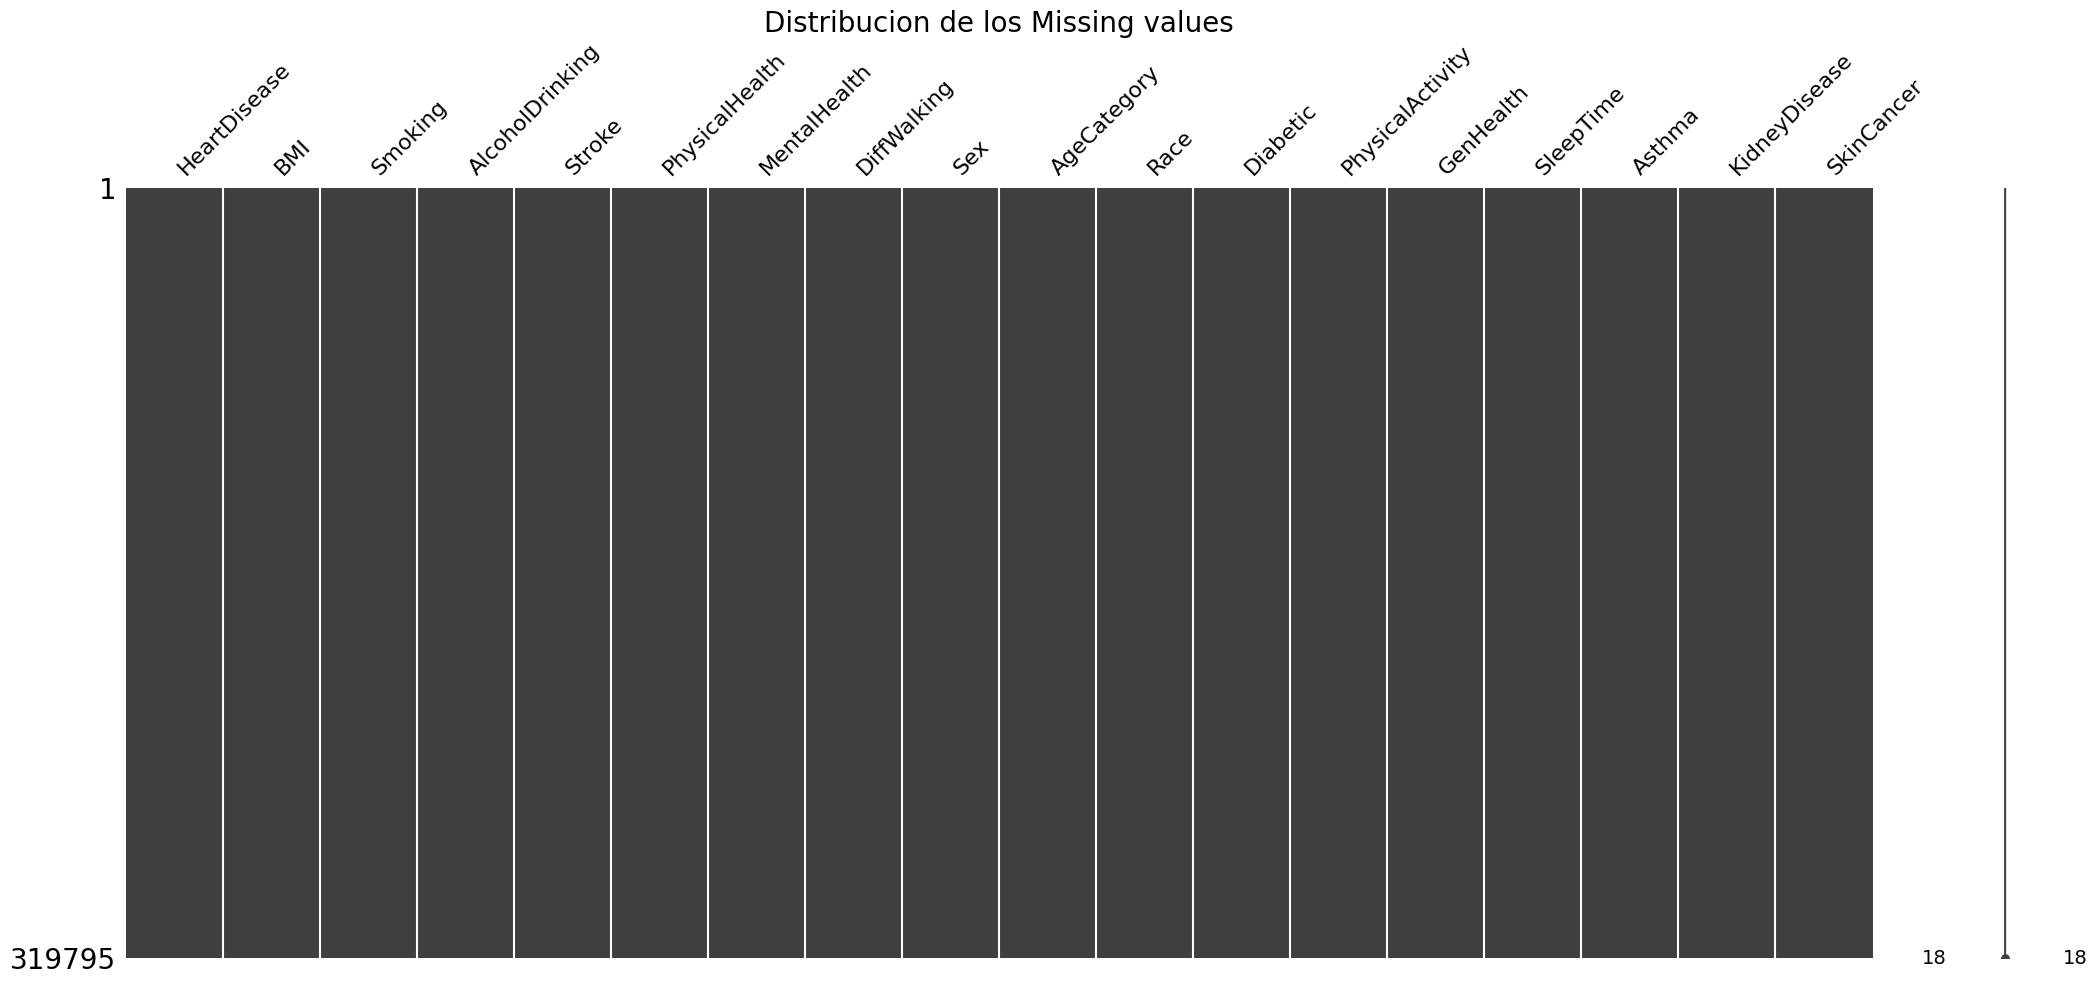

In [3]:
# Check if we have any missing in our columns
print(df_heart_disease.shape)
# Usamos la libreria msno para comprobar si tenemos algun Nan en nuestro dataset
msno.matrix(df_heart_disease)
plt.title('Distribucion de los Missing values', fontsize = 20)

Podemos ver que no tenemos ningun missing values 

## Análisis de los datos

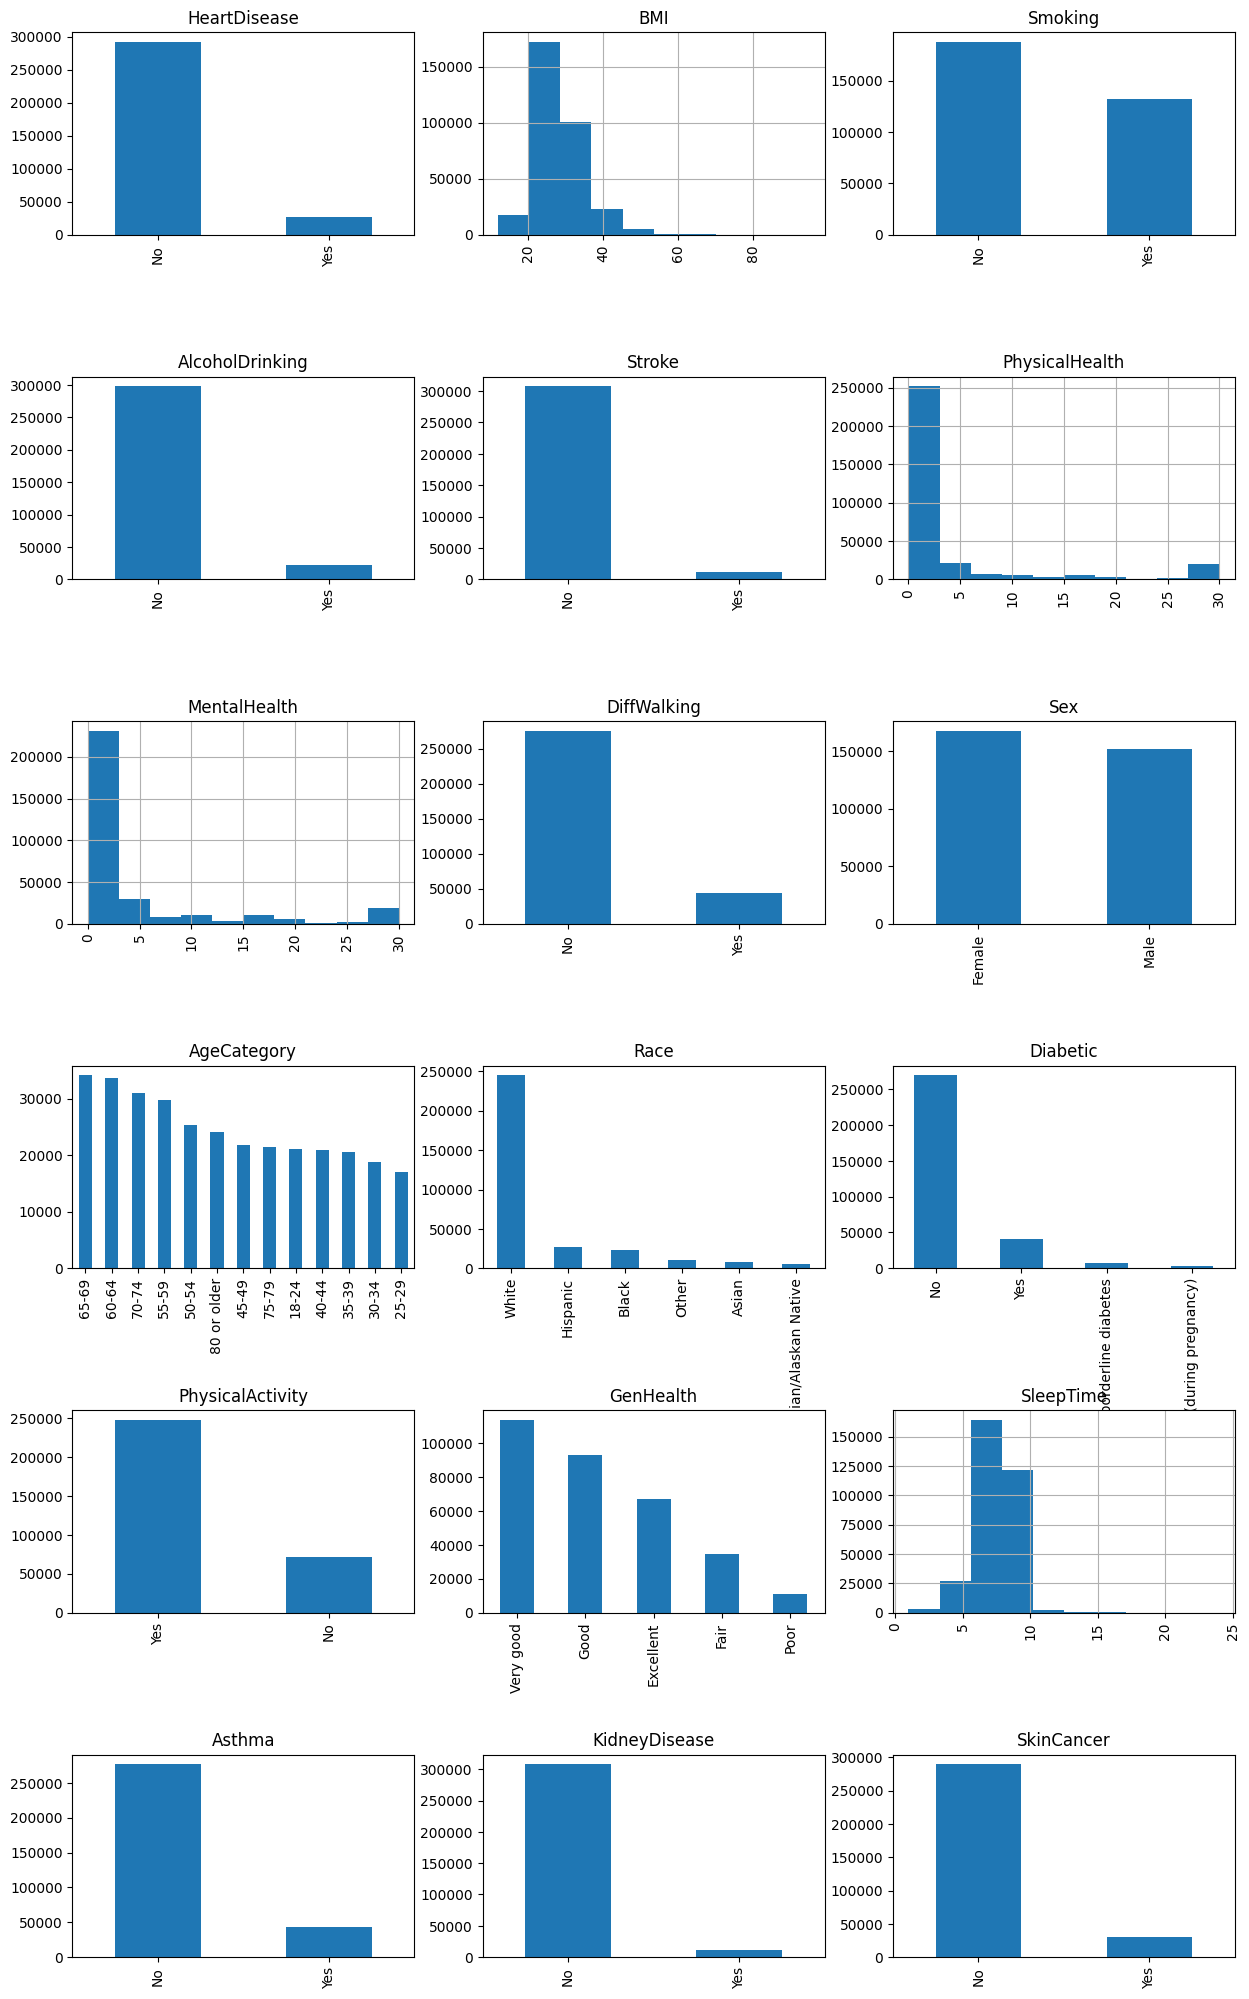

In [4]:
# Creamos una gráfica pairplot para visualizar bien nuestros datos

fig = plt.figure(figsize=(15, 25))
cols = 3
rows = int(np.ceil(float(df_heart_disease.shape[1]) / cols))
for i, column in enumerate(df_heart_disease.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_heart_disease.dtypes[column] == object:
        df_heart_disease[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_heart_disease[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

Como nuestro target es HeartDisease, vamos a ver que relación tienen el restos de atributos con él.

In [5]:
df_heart_disease.keys()

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

- **BMI**:

<AxesSubplot: xlabel='BMI', ylabel='HeartDisease'>

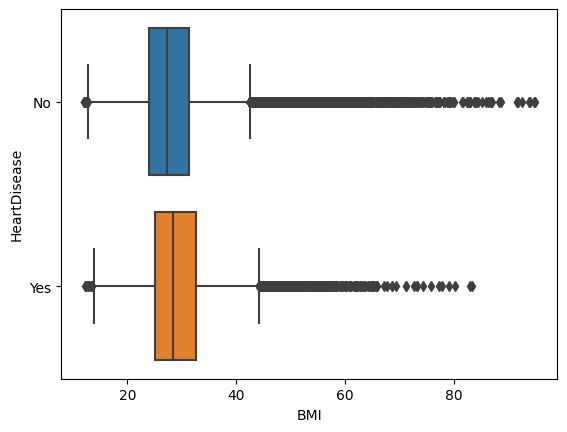

In [6]:
sns.boxplot(x = df_heart_disease['BMI'], y = df_heart_disease['HeartDisease'])

- **Smoking**:

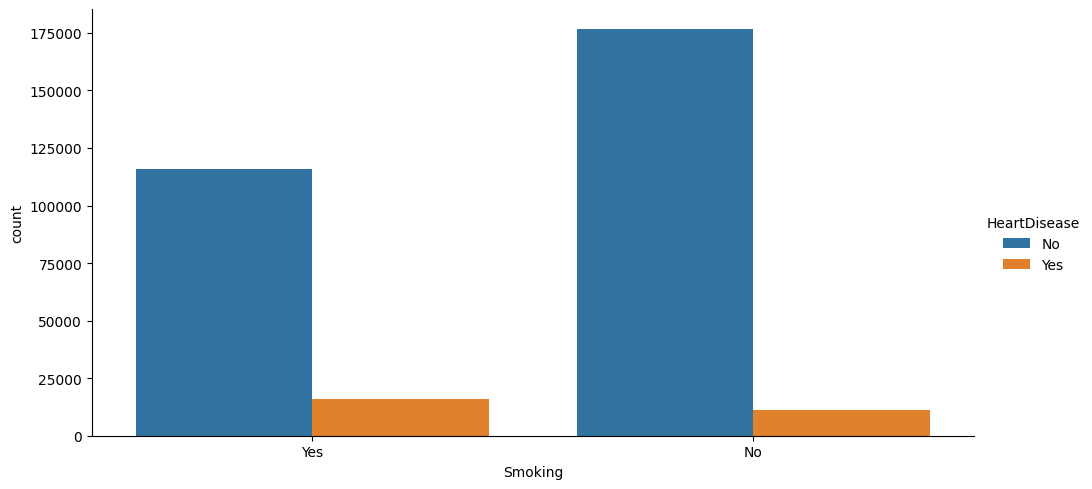

In [7]:
sns.catplot(x = 'Smoking', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **AlcoholDrinking**:

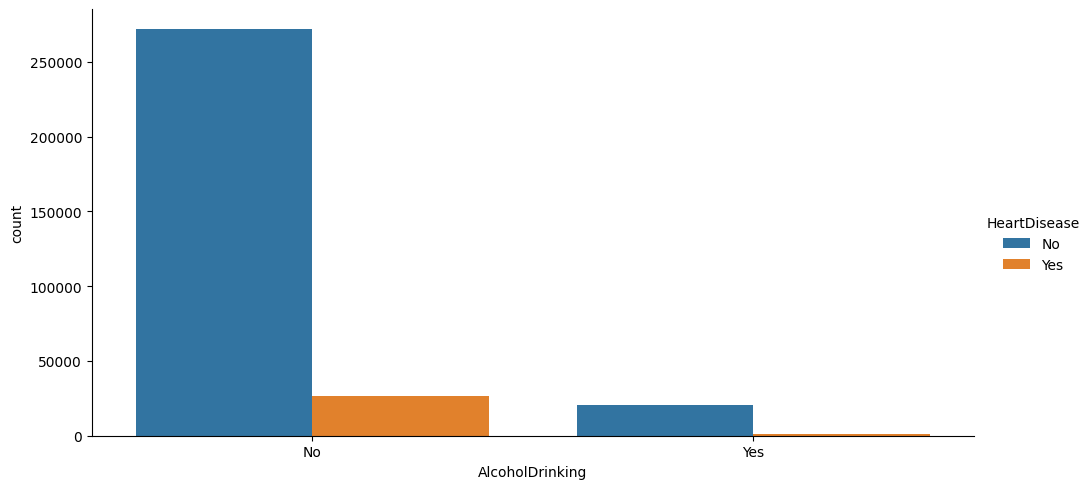

In [8]:
sns.catplot(x = 'AlcoholDrinking', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **Stroke**:

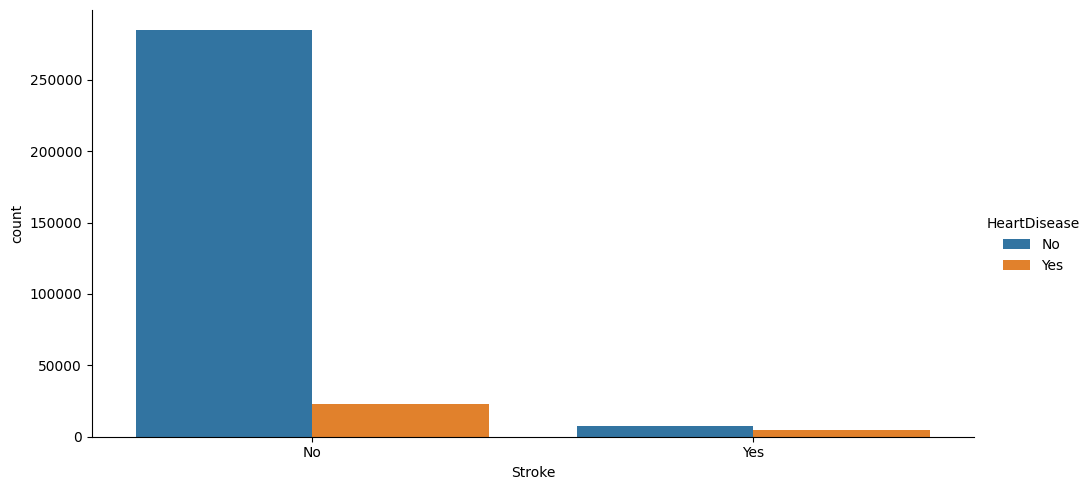

In [9]:
sns.catplot(x = 'Stroke', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **PhysicalHealth**:

<AxesSubplot: xlabel='PhysicalHealth', ylabel='HeartDisease'>

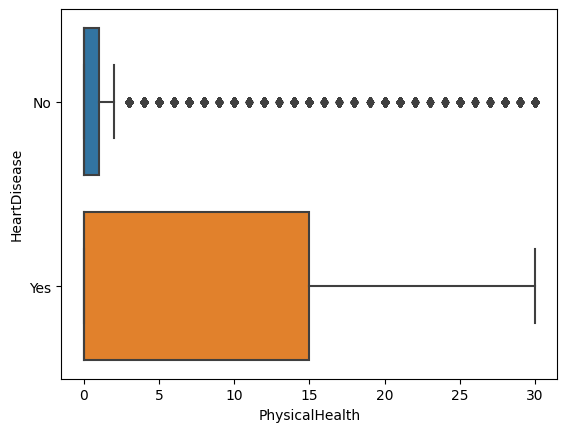

In [10]:
sns.boxplot(x = df_heart_disease['PhysicalHealth'], y = df_heart_disease['HeartDisease'])

- **MentalHealth**:

<AxesSubplot: xlabel='MentalHealth', ylabel='Density'>

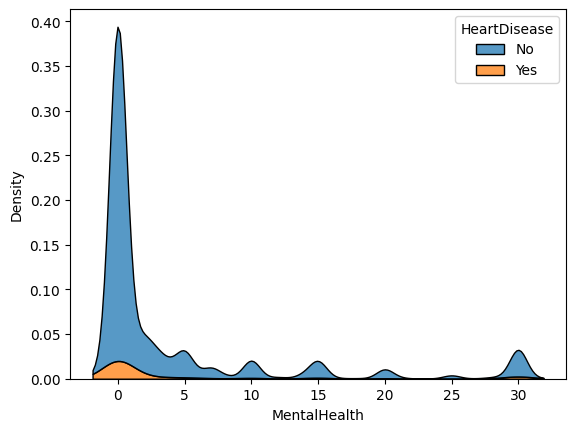

In [11]:
sns.kdeplot(data = df_heart_disease, x = 'MentalHealth', hue = 'HeartDisease', multiple = 'stack')

<AxesSubplot: xlabel='MentalHealth', ylabel='HeartDisease'>

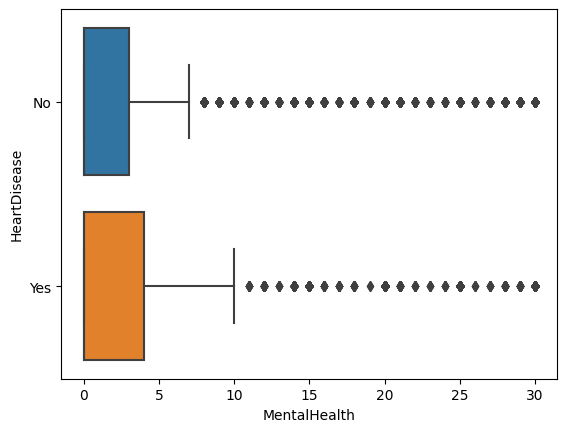

In [12]:
sns.boxplot(x = df_heart_disease['MentalHealth'], y = df_heart_disease['HeartDisease'])

- **DiffWalking**:

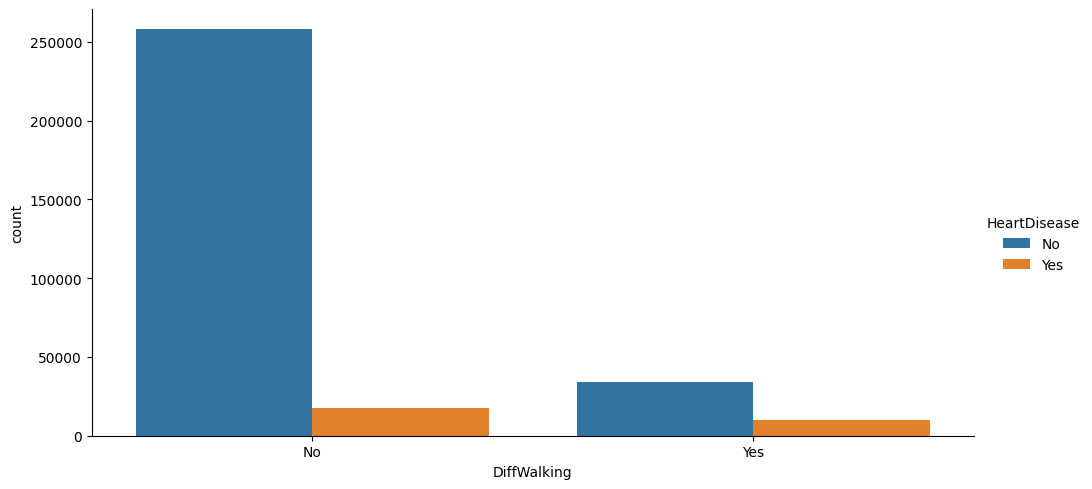

In [13]:
sns.catplot(x = 'DiffWalking', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **Sex**: male or female (hombre o mujer).

<AxesSubplot: xlabel='Sex'>

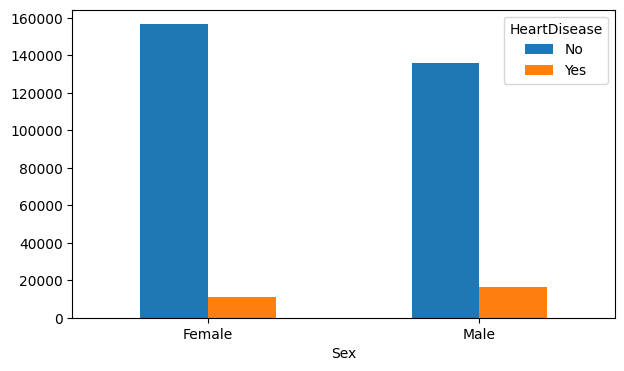

In [14]:
# Creamos nuestra gráfica con bar plot
CrosstabResult = pd.crosstab(index=df_heart_disease['Sex'], columns=df_heart_disease['HeartDisease'])

CrosstabResult.plot.bar(figsize=(7,4), rot = 0)

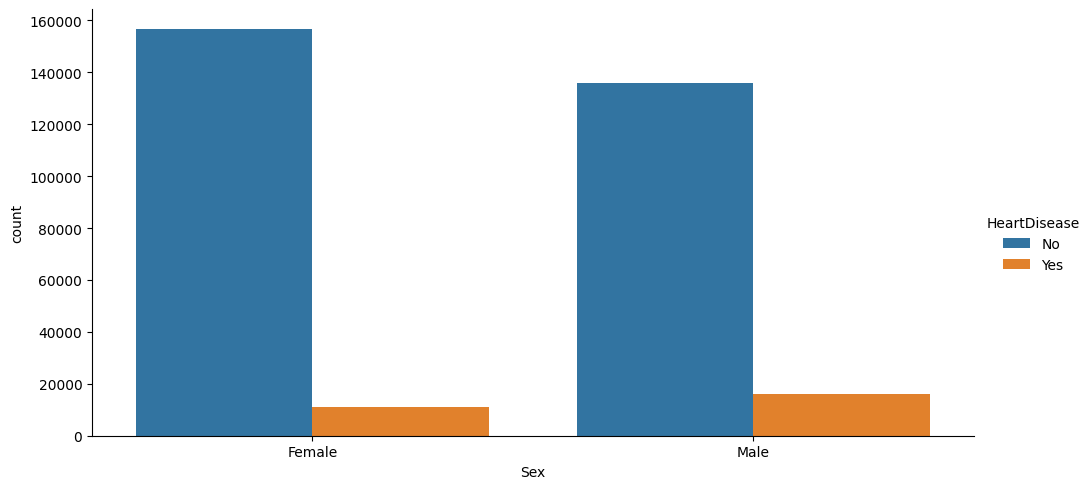

In [15]:
# Creamos la misma gráfica que la anterior pero con seaborn
sns.catplot(x = 'Sex', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

([<matplotlib.patches.Wedge at 0x1c5d6c93190>,
 [Text(-0.0853635950341179, 1.0966827511376531, 'Female'),
  Text(0.08536349235526744, -1.0966827591299648, 'Male')],
 [Text(-0.046561960927700666, 0.5981905915296288, '52.5%'),
  Text(0.04656190492105496, -0.5981905958890716, '47.5%')])

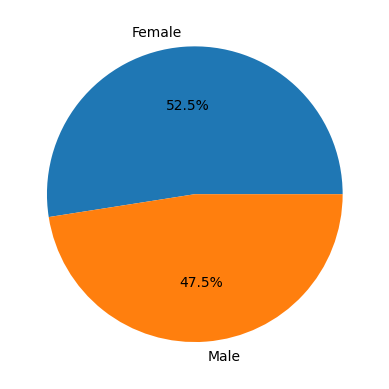

In [16]:
plt.pie(df_heart_disease['Sex'].value_counts(), labels = df_heart_disease['Sex'].unique(), autopct='%1.1f%%')


- **AgeCategory**:

In [17]:
x = df_heart_disease['AgeCategory'].sort_values()
x

289336          18-24
92977           18-24
228704          18-24
49749           18-24
49753           18-24
             ...     
261373    80 or older
203667    80 or older
261380    80 or older
261449    80 or older
319794    80 or older
Name: AgeCategory, Length: 319795, dtype: object

In [18]:
ordenAgeCategory = df_heart_disease['AgeCategory'].sort_values(ascending=True).unique()

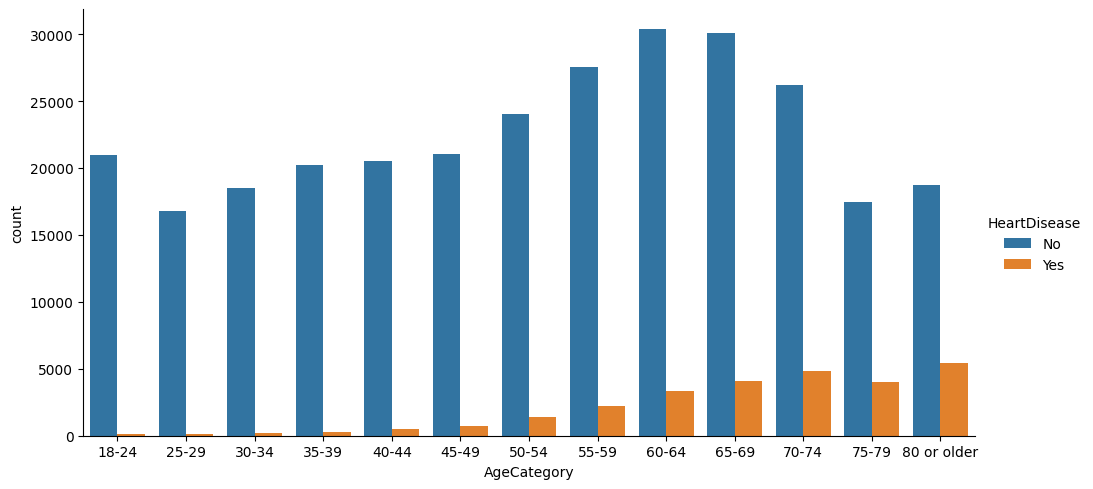

In [19]:
sns.catplot(x = 'AgeCategory', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease', order= ordenAgeCategory)


- **Race**:

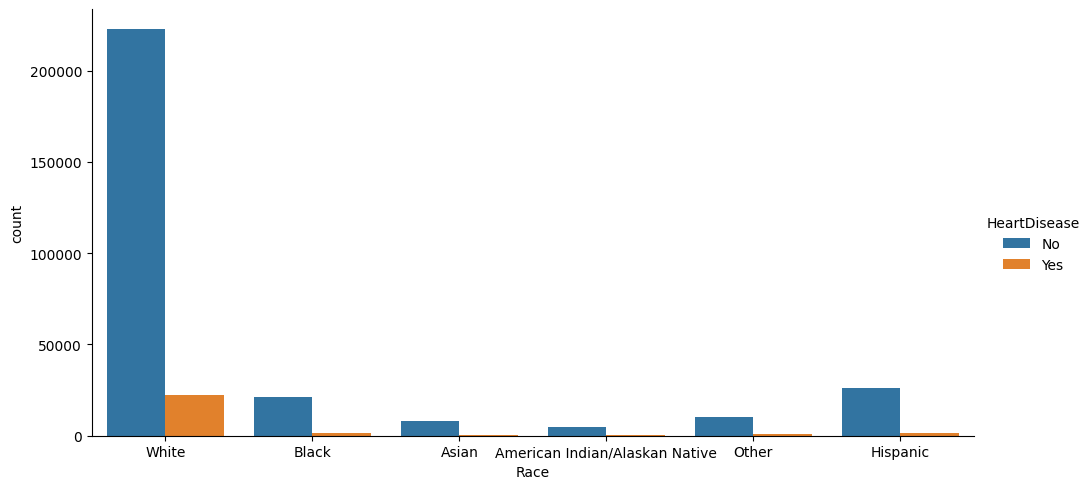

In [20]:
sns.catplot(x = 'Race', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **Diabetic**:

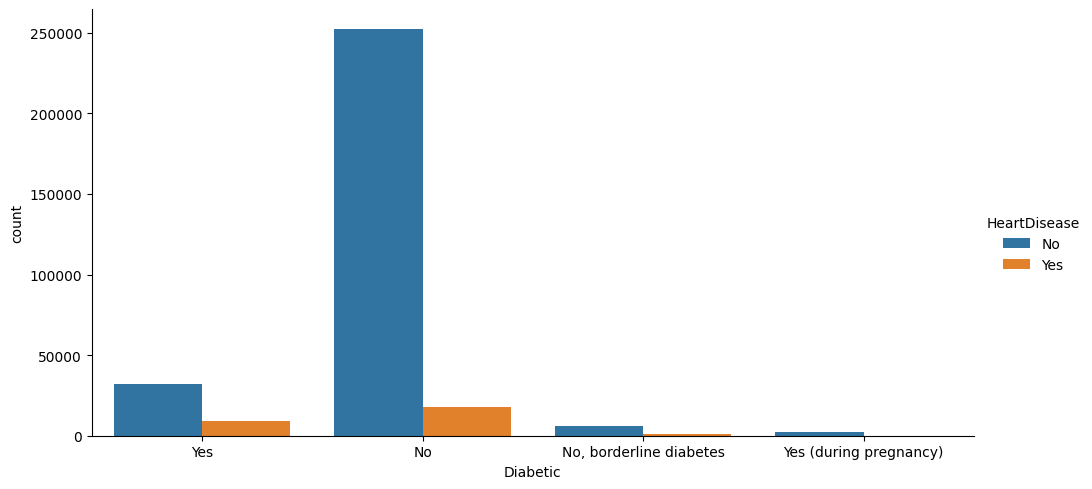

In [21]:
sns.catplot(x = 'Diabetic', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **PhysicalActivity**:

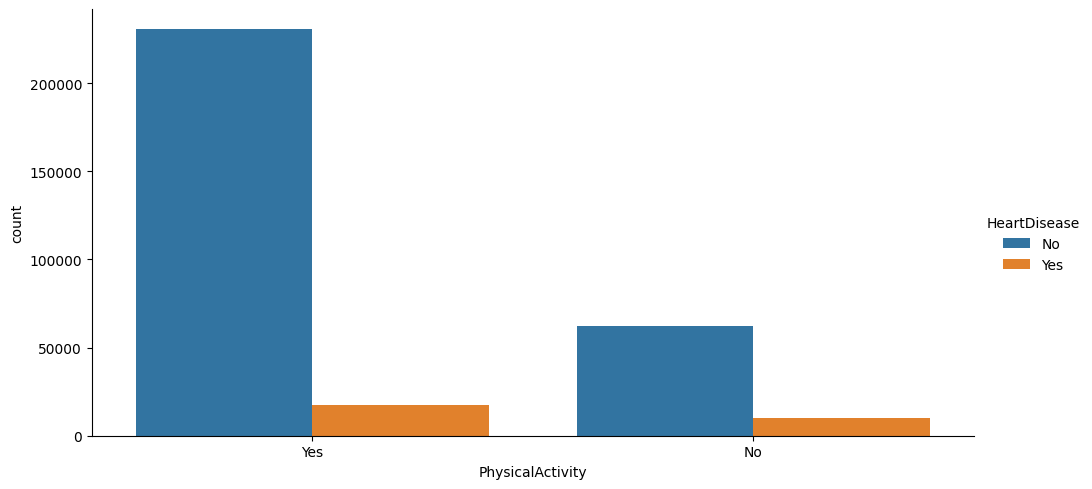

In [22]:
sns.catplot(x = 'PhysicalActivity', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **GenHealth**:

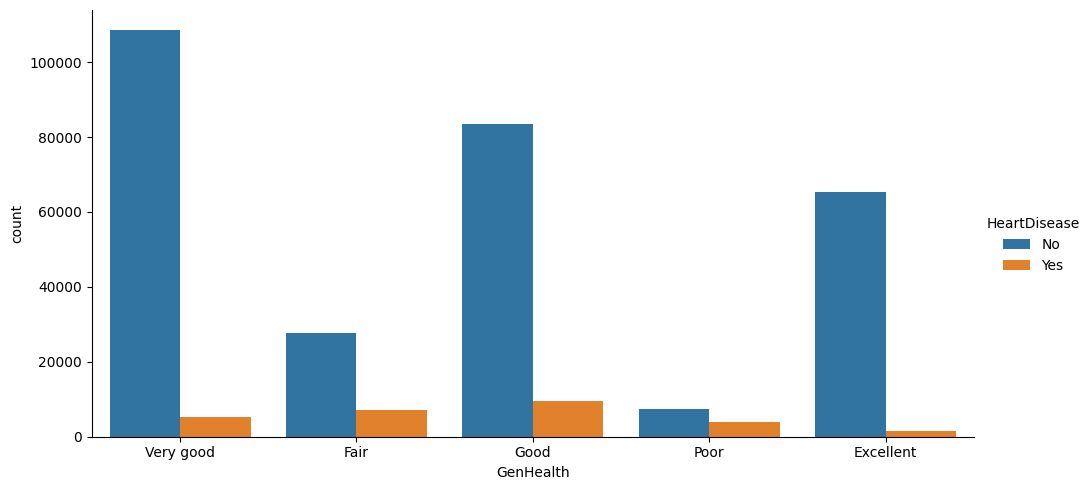

In [23]:
sns.catplot(x = 'GenHealth', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **SleepTime**:

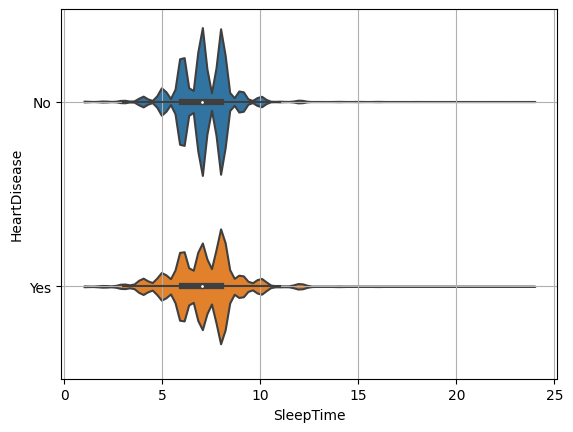

In [24]:
sns.violinplot(data = df_heart_disease, x = 'SleepTime', y = 'HeartDisease', cut = 0, bw=.15)
plt.grid()


- **Asthma**:

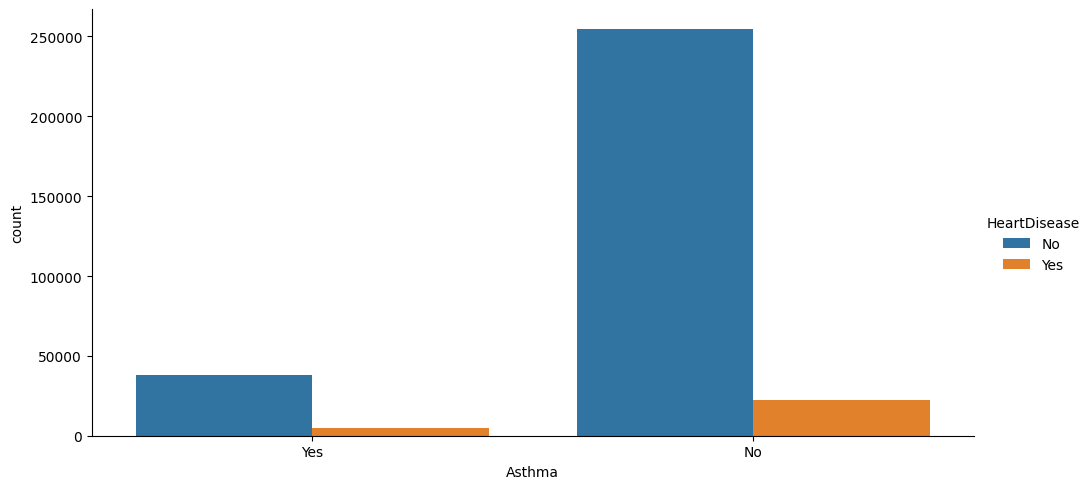

In [25]:
sns.catplot(x = 'Asthma', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **KidneyDisease**:

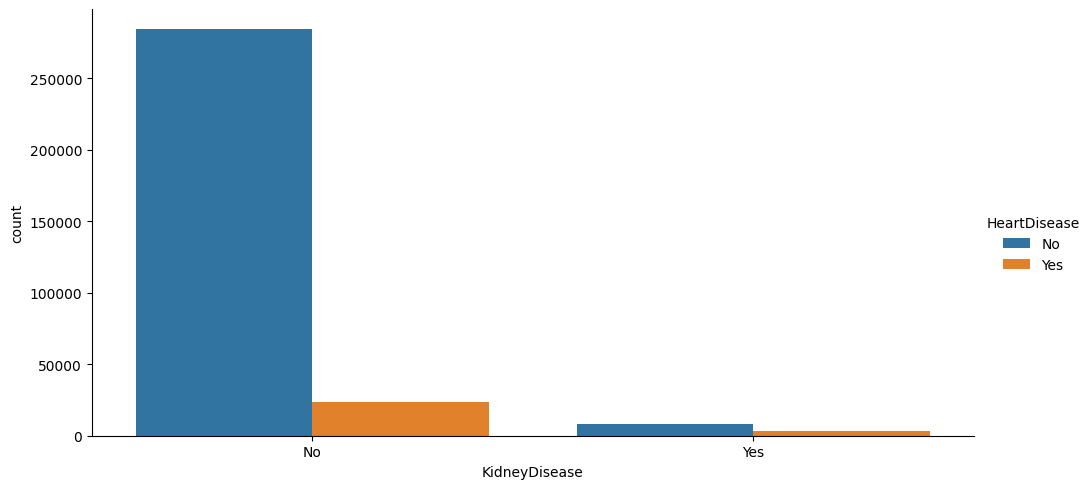

In [26]:
sns.catplot(x = 'KidneyDisease', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

- **SkinCancer**:

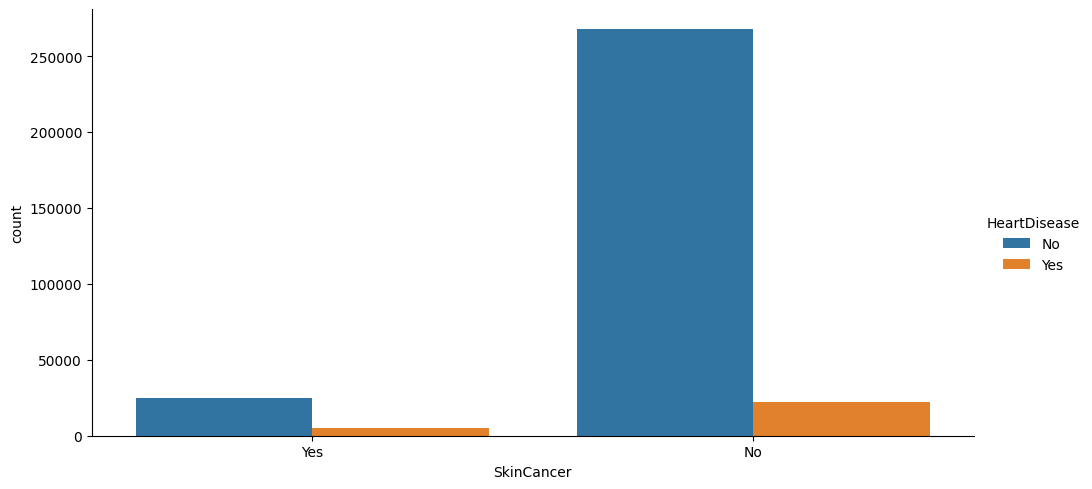

In [27]:
sns.catplot(x = 'SkinCancer', data = df_heart_disease, kind = 'count', aspect = 2, hue = 'HeartDisease')

## Características

In [28]:
# Comprobamos el tipo de dato de cada columna
df_heart_disease.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [29]:
df_heart_disease.keys()

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

En nuestro dataset tenemos datos numéricos continuos y discretos. Para simplicar sus definiciones, podemos decir que como regla general, los recuentos son discretos y las mediciones son continuas.

##### Atributos continuos:
- **BMI**: Body Mass Index (BMI) / Índice de Masa Corporal (IMC).
- **SleepTime**: número de horas que consigues dormir en un periódo de 24h.

##### Atributos discretos:
- **MentalHealth**: cuántos dias tuviste una enfermedad/lesión mental en los últimos 30 dias.
- **PhysicalHealth**: cuántos dias tuviste una enfermedad/lesión física en los últimos 30 dias.

#### Atributos categóricos:
- **HeartDisease**: encuestados que alguna vez informaron tener enfermedad coronaria (CHD) o infarto de miocardio (MI).
- **Smoking**: si has fumado más de 100 cigarros en toda tu vida (5 paquetes).
- **AlcoholDrinking**: si eres una persona que consume mucho alcohol a la semana (hombres: 14 bebidas, mujeres: 7).
- **Stroke**: si alguna vez tuviste un derrame cerebral.
- **DiffWalking**: si tienes serios problemas para andar o subir escaleras.
- **Sex**: male or female (hombre o mujer).
- **AgeCategory**: hay 14 diferentes rangos de edades.
- **Race**: raza.
- **Diabetic**: si eres diabético.
- **PhysicalActivity**: si has hecho ejercicio físico en los últimos 30 días.
- **GenHealth**: cómo crees que es tu salud en términos generales.
- **Asthma**: si tienes asma.
- **KidneyDisease**: si tienes alguna enfermedad renal sin incluir cálculos renales, infección de la vejiga o incontinencia.
- **SkinCancer**: si tienes cáncer de piel.



A pesar de que tenemos atributos categóricos, podemos tranformarlos en atributos numéricos continuos usando los métodos ***get_dummies***, ***LabelEncoder*** y ***one-hot-encoder***


In [30]:
# Separamos las variables categóricas en binarias y no binarias

col_cat = df_heart_disease.columns[df_heart_disease.dtypes == object]
print(col_cat)

var_cat_yesNo = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke",
                 "DiffWalking", "Sex", "PhysicalActivity", "Asthma",
                 "KidneyDisease", "SkinCancer"]





Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


#### Phik matrix/heatmap
Esta matriz es un muy buen indicador sobre la relación entre los datos, teniendo en cuenta variables categóricas.

interval columns not set, guessing: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


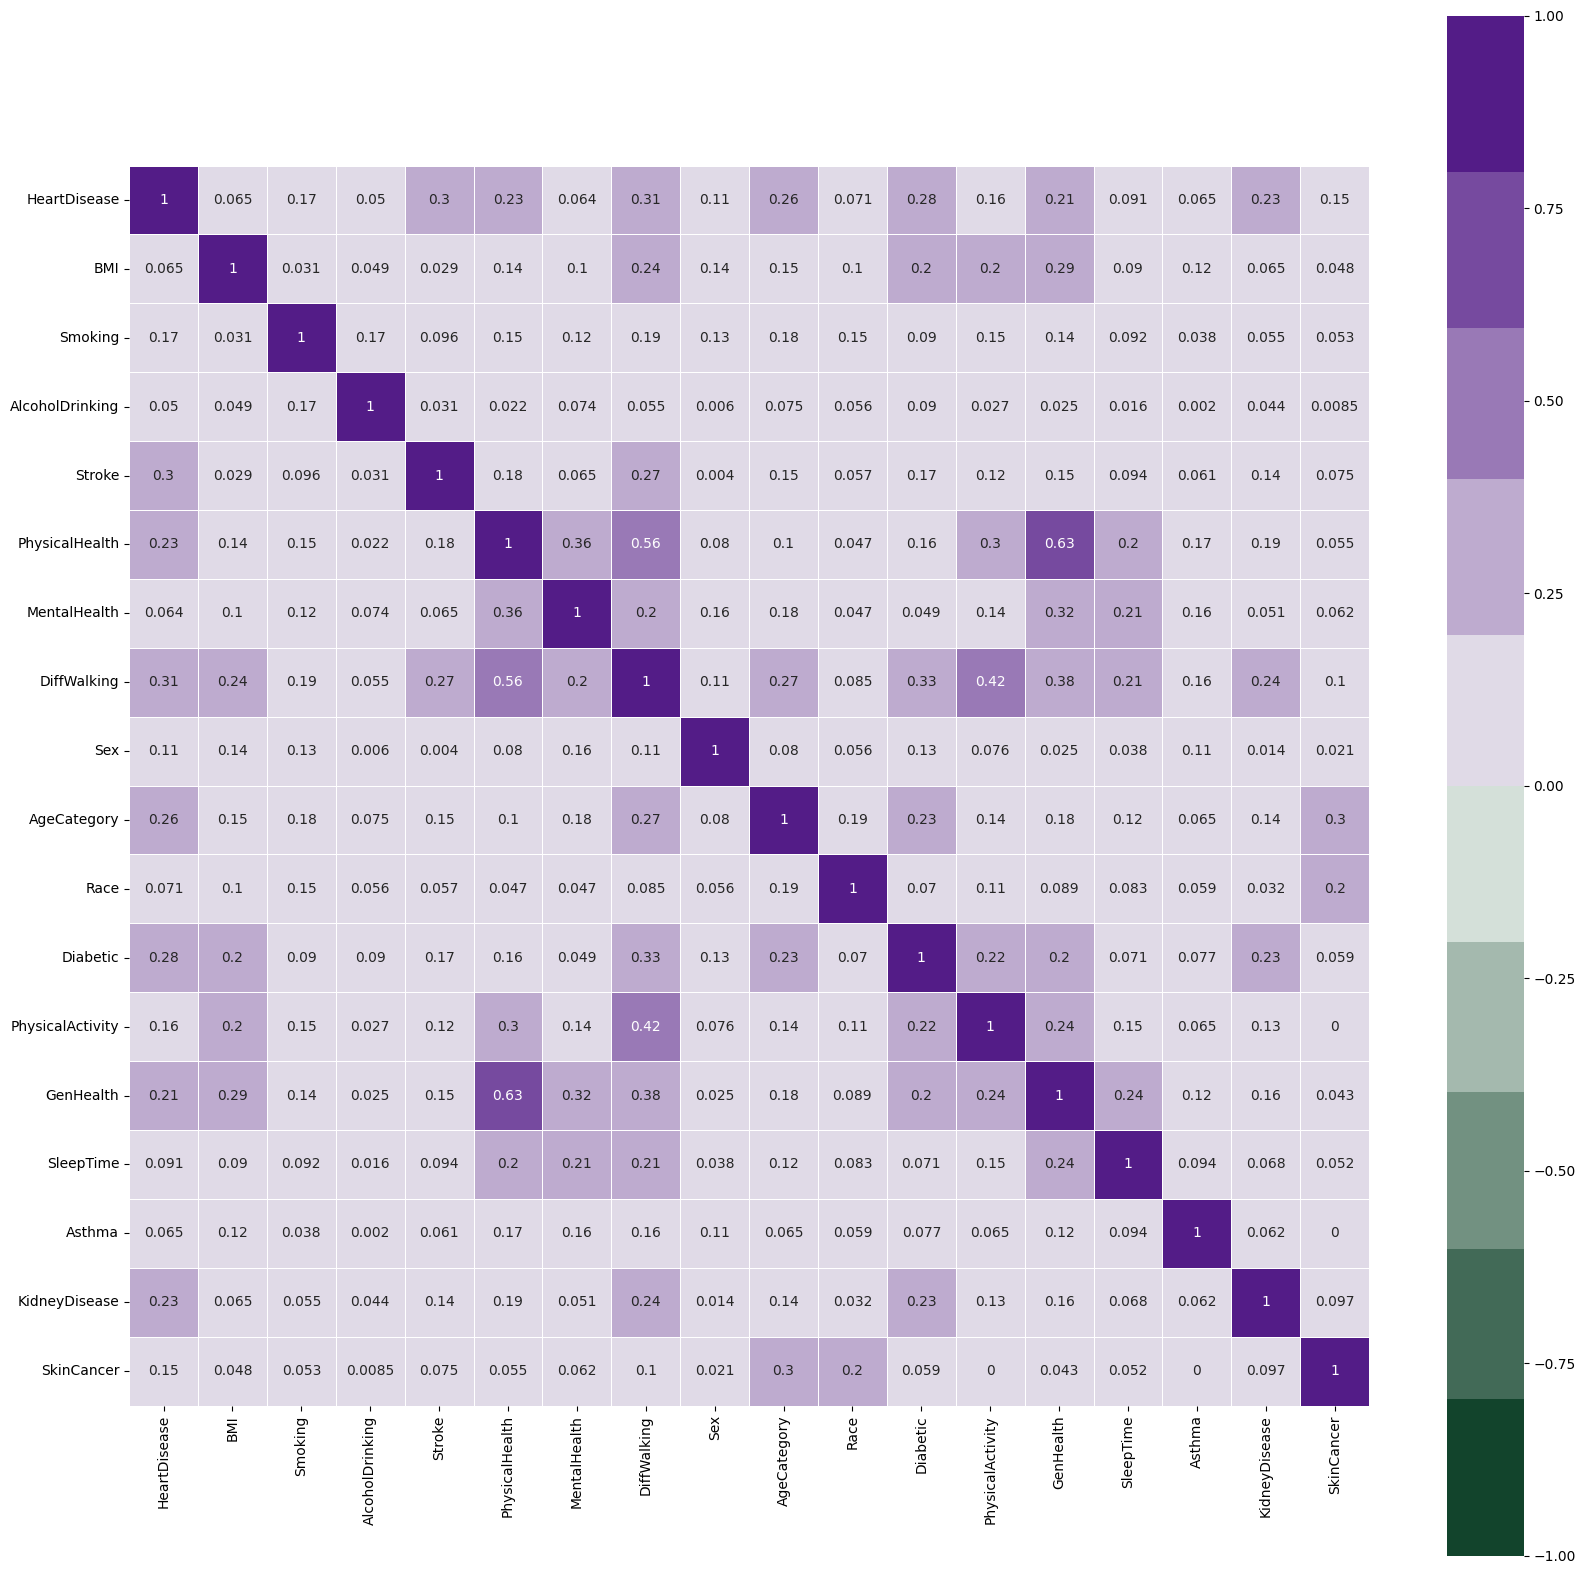

In [31]:
#!pip install phik
import phik
phik_matrix = df_heart_disease.phik_matrix()

plt.figure(figsize=(20,20))
sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [32]:
corr_pairs = phik_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind = 'quicksort', ascending=False).head(30)
sorted_pairs

HeartDisease      HeartDisease        1.000000
AgeCategory       AgeCategory         1.000000
AlcoholDrinking   AlcoholDrinking     1.000000
Stroke            Stroke              1.000000
PhysicalHealth    PhysicalHealth      1.000000
MentalHealth      MentalHealth        1.000000
DiffWalking       DiffWalking         1.000000
Sex               Sex                 1.000000
Race              Race                1.000000
BMI               BMI                 1.000000
Diabetic          Diabetic            1.000000
PhysicalActivity  PhysicalActivity    1.000000
GenHealth         GenHealth           1.000000
SleepTime         SleepTime           1.000000
Asthma            Asthma              1.000000
KidneyDisease     KidneyDisease       1.000000
Smoking           Smoking             1.000000
SkinCancer        SkinCancer          1.000000
PhysicalHealth    GenHealth           0.628611
GenHealth         PhysicalHealth      0.628611
PhysicalHealth    DiffWalking         0.560369
DiffWalking  

In [33]:
# Transformamos las variables categóricas que son Yes/No y Male/Female en numericas 1/0 con un Label Encoder
le = preprocessing.LabelEncoder()

for i in var_cat_yesNo:

    le.fit(df_heart_disease[i])

    df_heart_disease[i] = le.transform(df_heart_disease[i])
    
df_heart_disease

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory      Race Diabetic  \
0               30.0            0    0        55-59     White      Yes   
1                0.0            0    0  80 or older     White       No   
2               30.0            0    1        65-69     White      Yes   
3                0.0            0    0        75-79     White       No   
4                0.0            1    0        40-44     White       No   
...              ...          ...  ...          ...       ...      ...   
319790           0.0            1    1        60-64  Hispanic      Yes   
319791           0.0            0    1        35-39  Hispanic       No   
319792           0.0            0    0        45-49  Hispanic       No   
319793           0.0            0    0        25-29  Hispanic       No   
319794           0.0            0    0  80 or older  Hispanic       No   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1  Very good        5.0       1              0   
1                      1  Very good        7.0       0              0   
2                      1       Fair        8.0       1              0   
3                      0       Good        6.0       0              0   
4                      1  Very good        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0       Fair        6.0       1              0   
319791                 1  Very good        5.0       1              0   
319792                 1       Good        6.0       0              0   
319793                 0       Good       12.0       0              0   
319794                 1       Good        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

Vamos a transformar todas nuestros atributos categóricos en numéricos con un ***one-hot-encoder***.
Para ello, lo primero que vamos hacer es ver cuales son nuestras variables categóricas.

In [34]:
# Usamos one-hot encoding para múltiples columnas y recomponemos nuestro dataframes
var_cat_No_bin = ['AgeCategory','Race','Diabetic', 'GenHealth']

# verbose_feature_names_out=False es para mantener los nombres sin prefijos
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), var_cat_No_bin),
                                       remainder='passthrough',
                                       verbose_feature_names_out=False) 

transformer.fit(df_heart_disease)

transformed = transformer.transform(df_heart_disease)

#transformed = transformer.fit_transform(df_heart_disease)

df_heart_disease_transformed = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

df_heart_disease_transformed

AgeCategory_18-24  AgeCategory_25-29  AgeCategory_30-34  \
0                     0.0                0.0                0.0   
1                     0.0                0.0                0.0   
2                     0.0                0.0                0.0   
3                     0.0                0.0                0.0   
4                     0.0                0.0                0.0   
...                   ...                ...                ...   
319790                0.0                0.0                0.0   
319791                0.0                0.0                0.0   
319792                0.0                0.0                0.0   
319793                0.0                1.0                0.0   
319794                0.0                0.0                0.0   

        AgeCategory_35-39  AgeCategory_40-44  AgeCategory_45-49  \
0                     0.0                0.0                0.0   
1                     0.0                0.0                0.0   
2                     0.0                0.0                0.0   
3                     0.0                0.0                0.0   
4                     0.0                1.0                0.0   
...                   ...                ...                ...   
319790                0.0                0.0                0.0   
319791                1.0                0.0                0.0   
319792                0.0                0.0                1.0   
319793                0.0                0.0                0.0   
319794                0.0                0.0                0.0   

        AgeCategory_50-54  AgeCategory_55-59  AgeCategory_60-64  \
0                     0.0                1.0                0.0   
1                     0.0                0.0                0.0   
2                     0.0                0.0                0.0   
3                     0.0                0.0                0.0   
4                     0.0                0.0                0.0   
...                   ...                ...                ...   
319790                0.0                0.0                1.0   
319791                0.0                0.0                0.0   
319792                0.0                0.0                0.0   
319793                0.0                0.0                0.0   
319794                0.0                0.0                0.0   

        AgeCategory_65-69  ...  Stroke  PhysicalHealth  MentalHealth  \
0                     0.0  ...     0.0             3.0          30.0   
1                     0.0  ...     1.0             0.0           0.0   
2                     1.0  ...     0.0            20.0          30.0   
3                     0.0  ...     0.0             0.0           0.0   
4                     0.0  ...     0.0            28.0           0.0   
...                   ...  ...     ...             ...           ...   
319790                0.0  ...     0.0             7.0           0.0   
319791                0.0  ...     0.0             0.0           0.0   
319792                0.0  ...     0.0             0.0           0.0   
319793                0.0  ...     0.0             0.0           0.0   
319794                0.0  ...     0.0             0.0           0.0   

        DiffWalking  Sex  PhysicalActivity  SleepTime  Asthma  KidneyDisease  \
0               0.0  0.0               1.0        5.0     1.0            0.0   
1               0.0  0.0               1.0        7.0     0.0            0.0   
2               0.0  1.0               1.0        8.0     1.0            0.0   
3               0.0  0.0               0.0        6.0     0.0            0.0   
4               1.0  0.0               1.0        8.0     0.0            0.0   
...             ...  ...               ...        ...     ...            ...   
319790          1.0  1.0               0.0        6.0     1.0            0.0   
319791          0.0  1.0               1.0        5.0     1.0            0.0   
319792  

In [35]:
df_heart_disease_transformed.corr()

AgeCategory_18-24  AgeCategory_25-29  \
AgeCategory_18-24                             1.000000          -0.062831   
AgeCategory_25-29                            -0.062831           1.000000   
AgeCategory_30-34                            -0.066275          -0.059056   
AgeCategory_35-39                            -0.069586          -0.062006   
AgeCategory_40-44                            -0.070408          -0.062738   
AgeCategory_45-49                            -0.071806          -0.063984   
AgeCategory_50-54                            -0.077968          -0.069475   
AgeCategory_55-59                            -0.085055          -0.075790   
AgeCategory_60-64                            -0.091115          -0.081190   
AgeCategory_65-69                            -0.091816          -0.081815   
AgeCategory_70-74                            -0.087100          -0.077613   
AgeCategory_75-79                            -0.071258          -0.063496   
AgeCategory_80 or older                      -0.075898          -0.067631   
Race_American Indian/Alaskan Native           0.002726           0.005097   
Race_Asian                                    0.049566           0.037576   
Race_Black                                    0.002153           0.007886   
Race_Hispanic                                 0.077960           0.059780   
Race_Other                                    0.033253           0.022632   
Race_White                                   -0.086434          -0.069590   
Diabetic_No                                   0.097032           0.080156   
Diabetic_No, borderline diabetes             -0.023945          -0.017874   
Diabetic_Yes                                 -0.092745          -0.079988   
Diabetic_Yes (during pregnancy)              -0.009983           0.001304   
GenHealth_Excellent                           0.065924           0.047918   
GenHealth_Fair                               -0.047034          -0.037142   
GenHealth_Good                               -0.029306          -0.017925   
GenHealth_Poor                               -0.040685          -0.032709   
GenHealth_Very good                           0.018047           0.013041   
HeartDisease                                 -0.075385          -0.065759   
BMI                                          -0.107060          -0.023705   
Smoking                                      -0.138397          -0.052149   
AlcoholDrinking                               0.004334           0.023069   
Stroke                                       -0.048552          -0.040268   
PhysicalHealth                               -0.055866          -0.046707   
MentalHealth                                  0.075243           0.054452   
DiffWalking                                  -0.094715          -0.080330   
Sex                                           0.040865           0.026289   
PhysicalActivity                              0.052250           0.039850   
SleepTime                                     0.016524          -0.018231   
Asthma                                        0.033416           0.024371   
KidneyDisease                                -0.043093          -0.037750   
SkinCancer                                   -0.082247          -0.071893   

                                     AgeCategory_30-34  AgeCategory_35-39  \
AgeCategory_18-24                            -0.066275          -0.069586   
AgeCategory_25-29                            -0.059056          -0.062006   
AgeCategory_30-34                             1.000000          -0.065406   
AgeCategory_35-39                            -0.065406           1.000000   
AgeCategory_40-44                            -0.066178          -0.069484   
AgeCategory_45-49                            -0.067492          -0.070863   
AgeCategory_50-54                            -0.073284          -0.076944   
AgeCategory_55-59                            -0.079945          -0.083938   
AgeCategory_60-64               

Ahora creamos una matriz de correlación para ver las relaciones directas que hay despues de pasar nuestras variables categóricas a numéricas

<AxesSubplot: >

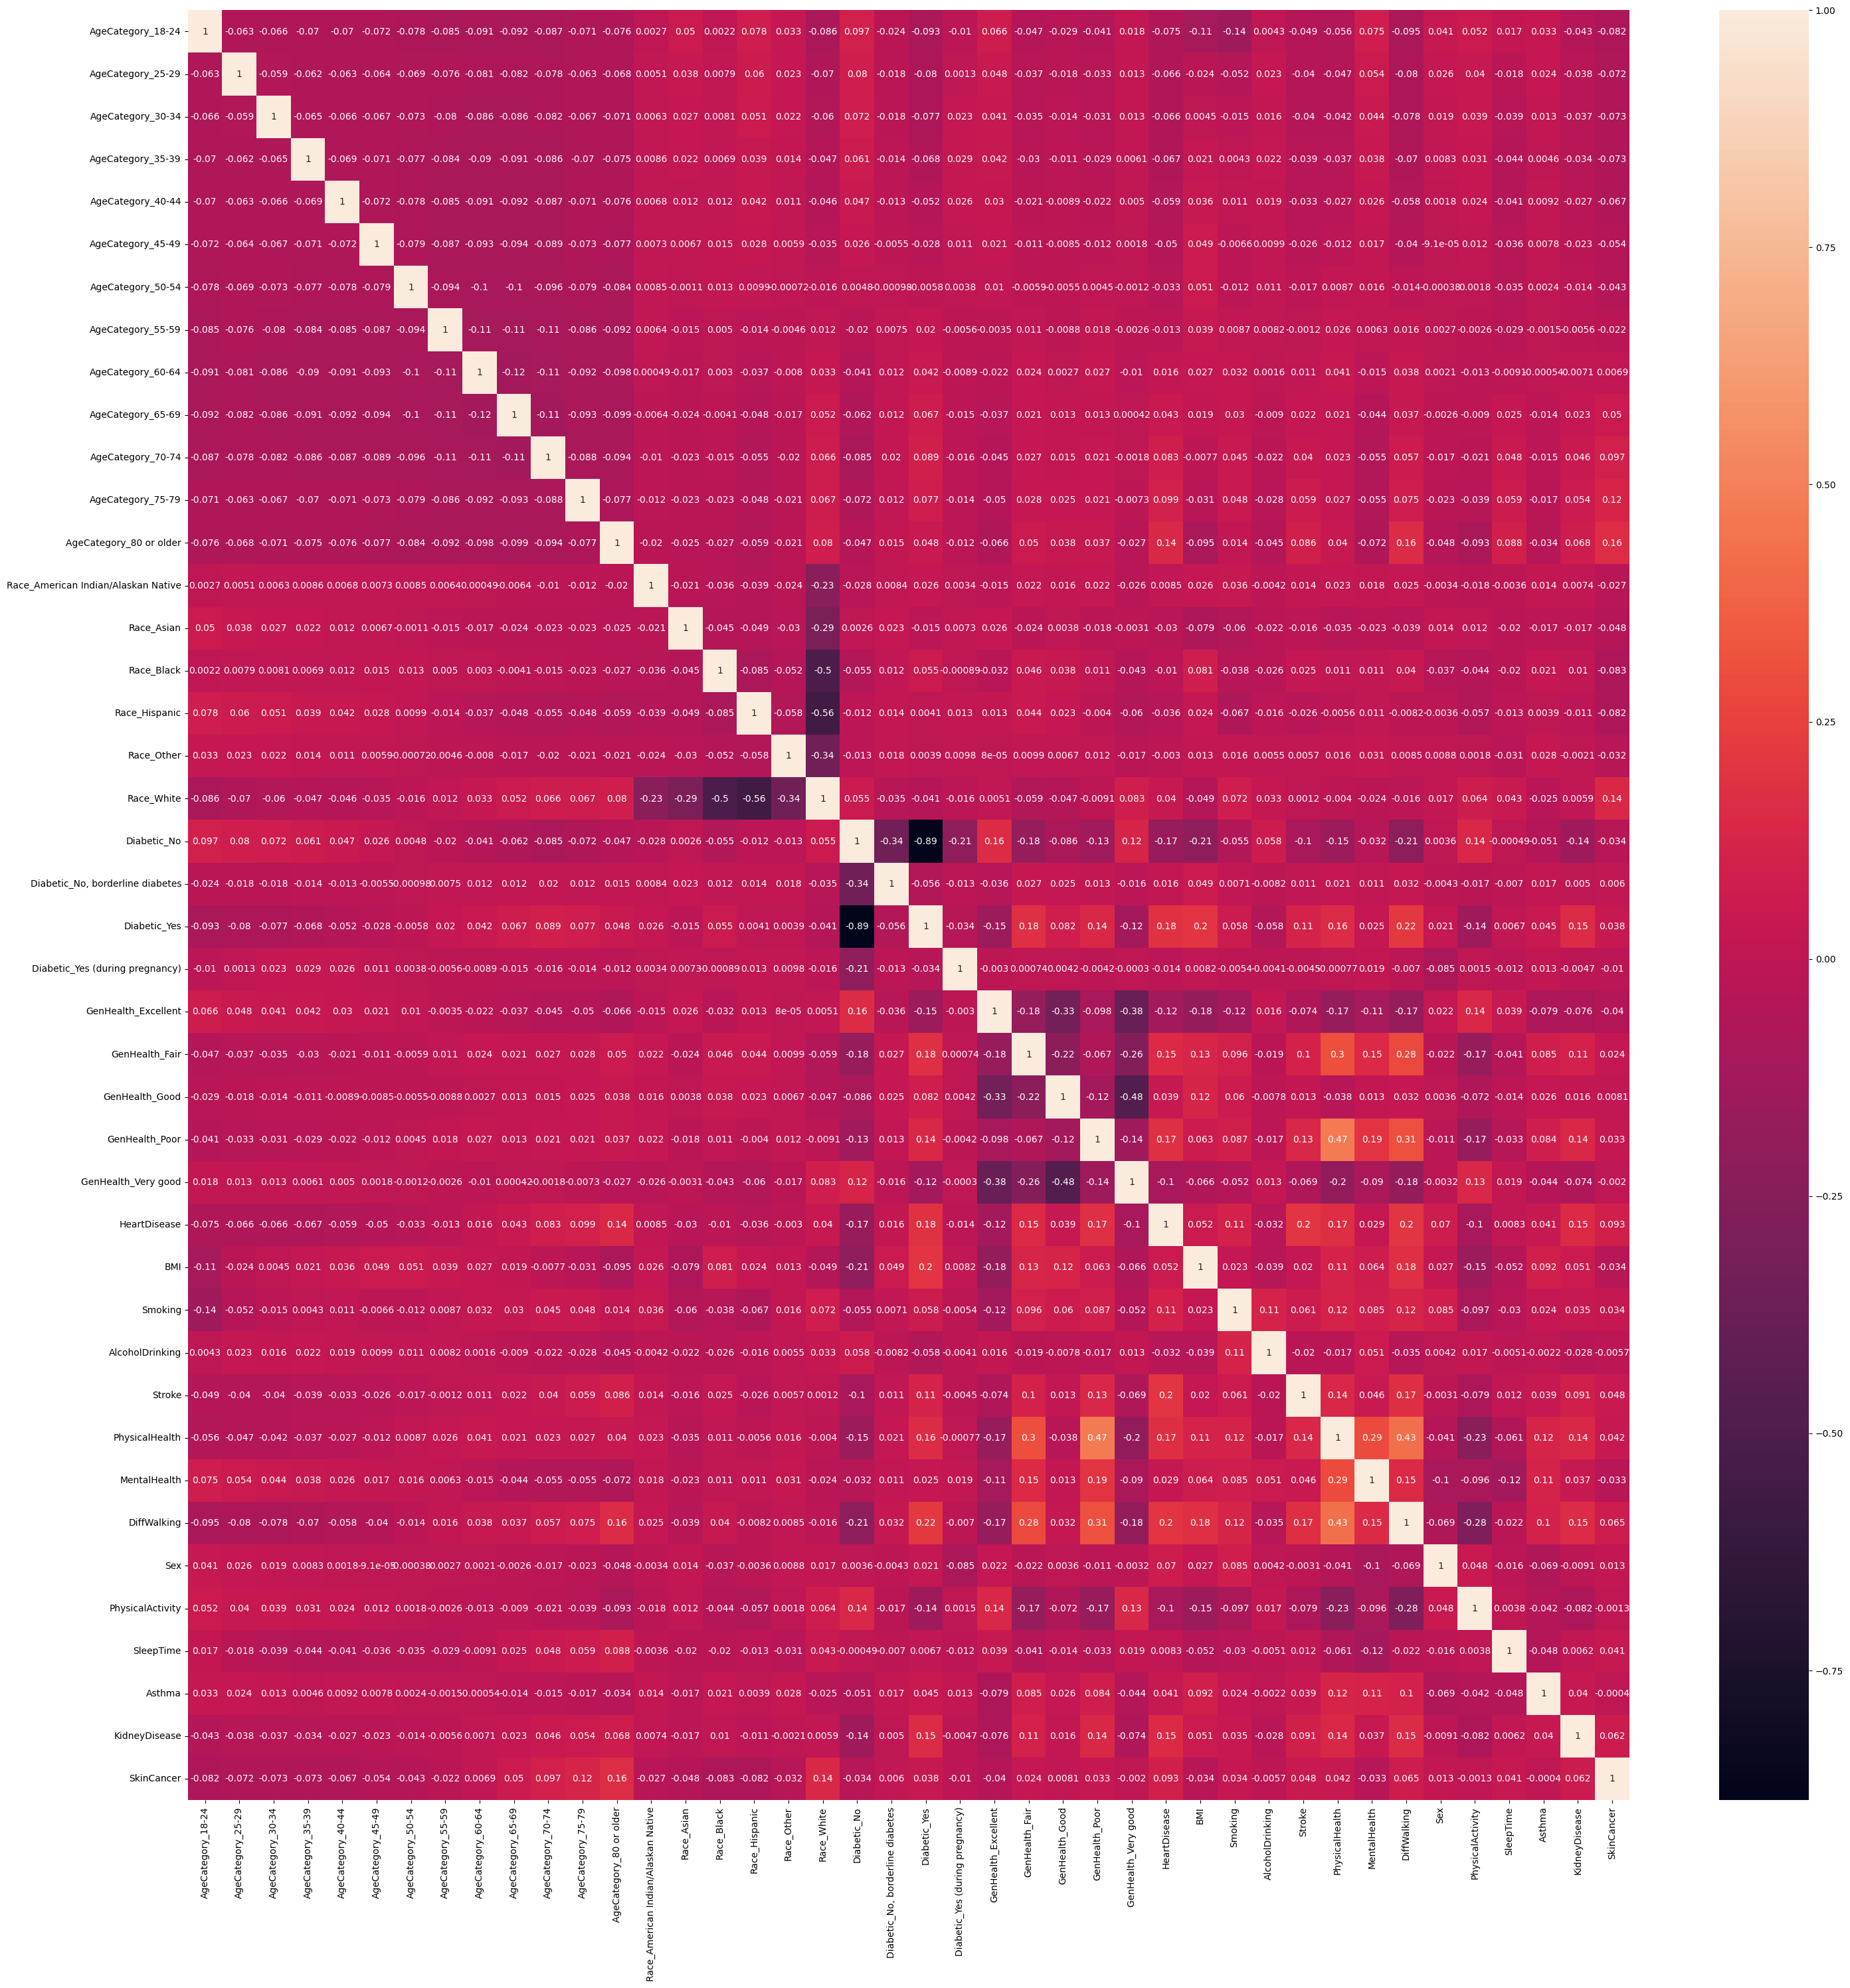

In [36]:
plt.figure(figsize=(35,35))
sns.heatmap(data = df_heart_disease_transformed.corr(), annot = True)

Ordenamos los valores de correlación de las parejas mediente el algoritmo de Quicksort

In [37]:
corr_pairs = df_heart_disease_transformed.corr().unstack()
sorted_pairs = corr_pairs.sort_values(kind = 'quicksort')
sorted_pairs

Diabetic_Yes                      Diabetic_No                        -0.886841
Diabetic_No                       Diabetic_Yes                       -0.886841
Race_White                        Race_Hispanic                      -0.555571
Race_Hispanic                     Race_White                         -0.555571
Race_White                        Race_Black                         -0.504040
                                                                        ...   
GenHealth_Fair                    GenHealth_Fair                      1.000000
GenHealth_Excellent               GenHealth_Excellent                 1.000000
Diabetic_Yes (during pregnancy)   Diabetic_Yes (during pregnancy)     1.000000
Diabetic_No, borderline diabetes  Diabetic_No, borderline diabetes    1.000000
SkinCancer                        SkinCancer                          1.000000
Length: 1764, dtype: float64

Ahora nos quedamos con las parejas que tengan más correlación directa (>0.7) e inversa(<-0.7)

In [38]:
strong_pairs = sorted_pairs[(sorted_pairs > 0.7) | (sorted_pairs < -0.7)]
sorted_pairs

Diabetic_Yes                      Diabetic_No                        -0.886841
Diabetic_No                       Diabetic_Yes                       -0.886841
Race_White                        Race_Hispanic                      -0.555571
Race_Hispanic                     Race_White                         -0.555571
Race_White                        Race_Black                         -0.504040
                                                                        ...   
GenHealth_Fair                    GenHealth_Fair                      1.000000
GenHealth_Excellent               GenHealth_Excellent                 1.000000
Diabetic_Yes (during pregnancy)   Diabetic_Yes (during pregnancy)     1.000000
Diabetic_No, borderline diabetes  Diabetic_No, borderline diabetes    1.000000
SkinCancer                        SkinCancer                          1.000000
Length: 1764, dtype: float64

# -------------------------AQUí---------------------------
### 1. Hacemos el split de la x e y en train y test
### 2. Balanceamos en x_train, y_train
### 3. Hacemos un shape de x_new e y_new
### 4. Miramos que esté balanceado x_new e y_new con Counter.collections


0    292422
1     27373
Name: HeartDisease, dtype: int64


Text(0, 0.5, 'Número de enfermos')

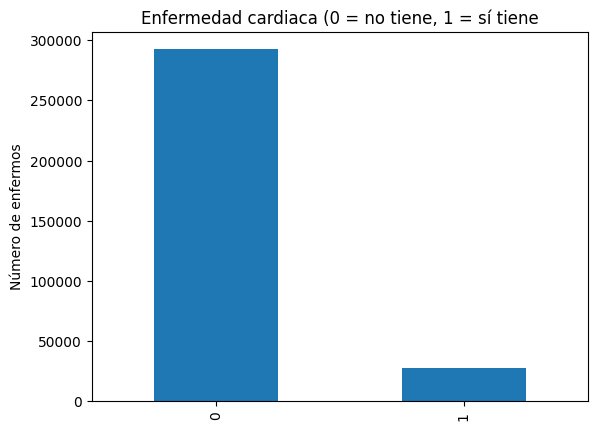

In [39]:
# Vemos si mis datos estan balanceados
print(df_heart_disease['HeartDisease'].value_counts())
ax = df_heart_disease['HeartDisease'].value_counts().plot(kind = 'bar')
ax.set_title('Enfermedad cardiaca (0 = no tiene, 1 = sí tiene')
ax.set_ylabel('Número de enfermos')

Como podemos observar, nuestros datos están desbalanceados. Por lo que usararemos el método de submuestreo (**undersampling**) que eliminan observaciones de la clase mayoritaria con la finalidad de igualar los tamaños de las clases. Esto es, disminuir el numero de personas que no tienen enfermedades cardiacas para que hay el mismo numero de personas enfermas del corazón y no

In [40]:
# Barajo todos mis datos para que en train y test no desaparezcan datos sin entrenar

df_heart_disease_transformed = df_heart_disease_transformed.sample(frac = 1.0, random_state = 42)

In [41]:
X = df_heart_disease_transformed.drop(['HeartDisease'], axis=1)
X


AgeCategory_18-24  AgeCategory_25-29  AgeCategory_30-34  \
271884                0.0                1.0                0.0   
270361                0.0                0.0                1.0   
219060                0.0                0.0                0.0   
24010                 0.0                0.0                0.0   
181930                0.0                0.0                0.0   
...                   ...                ...                ...   
119879                0.0                0.0                0.0   
259178                0.0                0.0                0.0   
131932                0.0                0.0                0.0   
146867                1.0                0.0                0.0   
121958                0.0                0.0                1.0   

        AgeCategory_35-39  AgeCategory_40-44  AgeCategory_45-49  \
271884                0.0                0.0                0.0   
270361                0.0                0.0                0.0   
219060                0.0                1.0                0.0   
24010                 0.0                0.0                0.0   
181930                0.0                0.0                0.0   
...                   ...                ...                ...   
119879                0.0                0.0                0.0   
259178                1.0                0.0                0.0   
131932                0.0                0.0                0.0   
146867                0.0                0.0                0.0   
121958                0.0                0.0                0.0   

        AgeCategory_50-54  AgeCategory_55-59  AgeCategory_60-64  \
271884                0.0                0.0                0.0   
270361                0.0                0.0                0.0   
219060                0.0                0.0                0.0   
24010                 0.0                0.0                0.0   
181930                0.0                0.0                1.0   
...                   ...                ...                ...   
119879                0.0                0.0                1.0   
259178                0.0                0.0                0.0   
131932                0.0                0.0                0.0   
146867                0.0                0.0                0.0   
121958                0.0                0.0                0.0   

        AgeCategory_65-69  ...  Stroke  PhysicalHealth  MentalHealth  \
271884                0.0  ...     0.0             0.0          25.0   
270361                0.0  ...     0.0             0.0          20.0   
219060                0.0  ...     0.0             0.0           0.0   
24010                 1.0  ...     0.0            30.0           0.0   
181930                0.0  ...     0.0            30.0          30.0   
...                   ...  ...     ...             ...           ...   
119879                0.0  ...     0.0             0.0           0.0   
259178                0.0  ...     0.0             0.0           5.0   
131932                1.0  ...     0.0            12.0           6.0   
146867                0.0  ...     0.0             7.0           5.0   
121958                0.0  ...     0.0             0.0           0.0   

        DiffWalking  Sex  PhysicalActivity  SleepTime  Asthma  KidneyDisease  \
271884          0.0  0.0               1.0        7.0     0.0            0.0   
270361          0.0  0.0               1.0        6.0     0.0            0.0   
219060          0.0  0.0               1.0        6.0     1.0            0.0   
24010           0.0  0.0               0.0        8.0     0.0            0.0   
181930          1.0  0.0               0.0        4.0     1.0            0.0   
...             ...  ...               ...        ...     ...            ...   
119879          0.0  1.0               0.0        8.0     0.0            0.0   
259178          0.0  1.0               1.0        6.0     0.0            0.0   
131932  

In [42]:
Y = df_heart_disease_transformed['HeartDisease']
Y

271884    0.0
270361    0.0
219060    0.0
24010     0.0
181930    0.0
         ... 
119879    0.0
259178    0.0
131932    0.0
146867    0.0
121958    0.0
Name: HeartDisease, Length: 319795, dtype: float64

#### Dividimos nuestra X e y en X_train, X_test, y_train, y_test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [45]:
# Usamos "RandomUnderSampler" de la librería imblearn

subsample = under_sampling.RandomUnderSampler(random_state = 42)

X_train_new, y_train_new = subsample.fit_resample(X_train, y_train)

print('Shape: ')
print('X_new: ', X_train_new.shape)
print('y_new: ', y_train_new.shape)


Shape: 
X_new:  (43800, 41)
y_new:  (43800,)


In [46]:
from collections import Counter

counter = Counter(y_train_new)
counter

Counter({0.0: 21900, 1.0: 21900})

## CREACIÓN DE MIS MODELOS

¿Cómo comprobamos esto? Mediante el análisis exploratorio. Aunque otra opción sería entrenar una regresión lineal y analizar la aleatoriedad de los residuos. Deberían caer en una nube alrededor del 0, sin patrones tipo una parábola.

<img src="D:\DATA_SCIENCE_bootcamp\thebridge_ft_sep22-main\thebridge_ft_sep22-main\entregables\ML\img\choose_algorithm2.png" alt="drawing" width="650"/>

### Modelo Logistic Regression

PASO 1: estandarizar los valores de las features para facilitar a nuestro equipo su trabajo

In [104]:
# Creamos un model StandardScaler
scaler = StandardScaler()

# Entrenamos y tranformamos nuestra X_train_new
X_train_new = scaler.fit_transform(X_train_new)

# Transfromamos nuestro X_test
X_test = scaler.transform(X_test)

Al ser un modelo de clasificación, podemos obtener diferentes métricas:
- confusion_matrix
- accuracy_score
- precision_score
- recall_score
- f1_score
- roc_auc_score
- precision_recall_curve
- roc_curve

PASO 2: creación del modelo Logistic Regression

In [105]:
# importamos las métricas de clasificacion que utilizaremos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score, precision_recall_curve,roc_curve


#Creamos nuestro modelo Logistic Regression
model = LogisticRegression(solver='liblinear', random_state = 42)

# Entrenamos nuestro modelo teniendo en cuenta nuestra X_train_new e y_train_new
model.fit(X_train_new, y_train_new)

# Calculamos la predicción de nuestro target teniendo en cuenta nuestro X_test
y_pred = model.predict(X_test)
print(y_pred)


[1. 0. 0. ... 0. 0. 0.]


PASO 3: comprobar como de satisfactorio es nuestro modelo teniendo en cuenta lo que queremos hallar. En nuestro caso, nuestra métrica que haremos hincapie es **RECALL** ya que lo que queremos comprobar  es cuantos HeartDisease con valor 1 se han clasificado bien vs todos los 1's que hay. O lo que es lo mismo, **Minimizar los FN**

[[43812 14674]
 [ 1215  4258]] 

Accuracy:  0.752
Prcision:  0.225
Recall:  0.778
F1-Score:  0.349
ROC-AUC:  0.764

Precision-Recall:  (array([0.08557044, 0.2249102 , 1.        ]), array([1.       , 0.7780011, 0.       ]), array([0., 1.]))


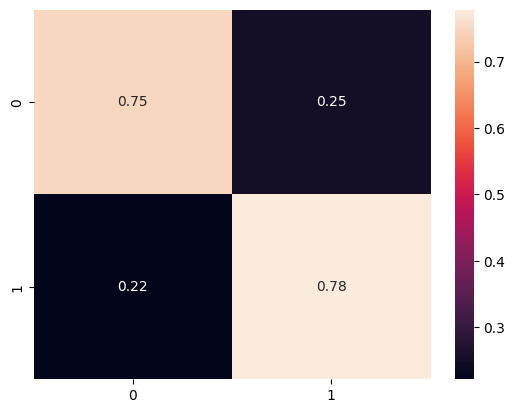

In [106]:
# Creamos una matriz de confusión para comprobar que tan buena es el accuracy de nuestro modelo modelo
c_mat = confusion_matrix(y_test, y_pred)
print(c_mat,'\n')

# Visualizamos la matriz de confusion
sns.heatmap(c_mat/c_mat.sum(axis=1, keepdims=True), annot= True);

# Calculamos todas nuestras métricas
print('Accuracy: ', round(accuracy_score(y_test, y_pred),3))
print('Prcision: ', round(precision_score(y_test, y_pred),3))
print('Recall: ', round(recall_score(y_test, y_pred),3))
print('F1-Score: ', round(f1_score(y_test, y_pred),3)) # Combinacion de precision y recall. Se usa cuando no se sabe cual de las dos metricas nos interesa
print('ROC-AUC: ', round(roc_auc_score(y_test, y_pred),3)) # Se suele usar para datasets balanceados
print()
print('Precision-Recall: ', precision_recall_curve(y_test, y_pred))

In [107]:
cr = classification_report(y_test, y_pred)
print(cr) 

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     58486
         1.0       0.22      0.78      0.35      5473

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



Como podemos comprobar, la mejor métrica es la de nuestro modelo, nos la da **RECALL**

In [108]:
parameters_lr = {'penalty': ['l1', 'l2'],
                 'random_state': [42],
                 'C': [0.1, 0.5, 1.0, 5.0], # Cuanta regularizacion queremos,
                 'max_iter': [50,100,500],  # Iteraciones del Gradient Descent. No suele impactar mucho
                                                     # pero en ocasiones aparecen warnings diciendo que se aumente
                 'solver': ['liblinear'],
                 'multi_class': ['auto']}

In [109]:
lr = LogisticRegression()
grid_lr = GridSearchCV(lr, parameters_lr, scoring = 'recall', cv = 5)
grid_lr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0], 'max_iter': [50, 100, 500],
                         'multi_class': ['auto'], 'penalty': ['l1', 'l2'],
                         'random_state': [42], 'solver': ['liblinear']},
             scoring='recall')

In [110]:
grid_lr.fit(X_train_new, y_train_new)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0], 'max_iter': [50, 100, 500],
                         'multi_class': ['auto'], 'penalty': ['l1', 'l2'],
                         'random_state': [42], 'solver': ['liblinear']},
             scoring='recall')

In [111]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.7817351598173516
{'C': 0.5, 'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}


In [112]:
lr_predictions = grid_lr.predict(X_test)
recall_score(y_test, lr_predictions)

0.7780010962908825

In [113]:
c_mat = confusion_matrix(y_test, lr_predictions)
print(c_mat,'\n')

[[43812 14674]
 [ 1215  4258]] 



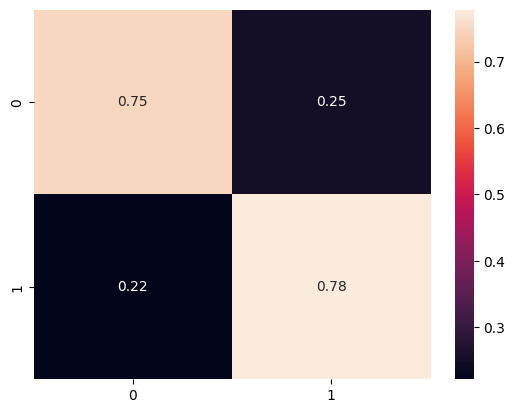

In [114]:
# Visualizamos la matriz de confusion
sns.heatmap(c_mat/c_mat.sum(axis=1, keepdims=True), annot= True);

In [115]:
cr = classification_report(y_test, lr_predictions)
print(cr) 

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     58486
         1.0       0.22      0.78      0.35      5473

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



## Modelo Decision Tree Classifier

Un árbol de dicision es un diagrama en forma de árbol que muestra los posibles resultados de una serie de decisiones relacionadas, la probabilidad estadística o determina un curso de acción.

Los nodos internos representan características, las ramas las reglas de decision y cada nodo hoja un resultado. Mientras que el nodo principal se llama nodo raíz.

PASO 1: Crear un diccionario de los parámetros que vamos a utilizar para dividir los datos utilizamos las Medidas de Seleccion de Atributos (ASM), de las cuales, las más conocidas son la entropía y el coeficiente de Gini.

In [116]:
parameters_dtc = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth': [2,3,4,5,6,7],
              'min_samples_leaf': np.arange(1,7),
              'random_state': [42],
              'class_weight': ['balanced']}

PASO 2: creamos nuestro model DecisionTreeClassifier y para comprobar cuales son nuestros mejores parametros, utilizaremos un GridSearchCV

In [117]:
tree_clf = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree_clf, parameters_dtc, scoring = 'recall', cv = 10)
grid_tree

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='recall')

Entrenamos nuestro grid_tree

In [118]:
grid_tree.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='recall')

Vemos cual es nuestra mejor score y parametros

In [119]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.8231506849315069
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'random_state': 42, 'splitter': 'random'}


Predecimos nuestro target con nuestra X_test y despues comparamos nuestra prediccion con nuestro y_test

In [120]:
tree_predictions = grid_tree.predict(X_test)
recall_score(y_test, tree_predictions)

0.8432304038004751

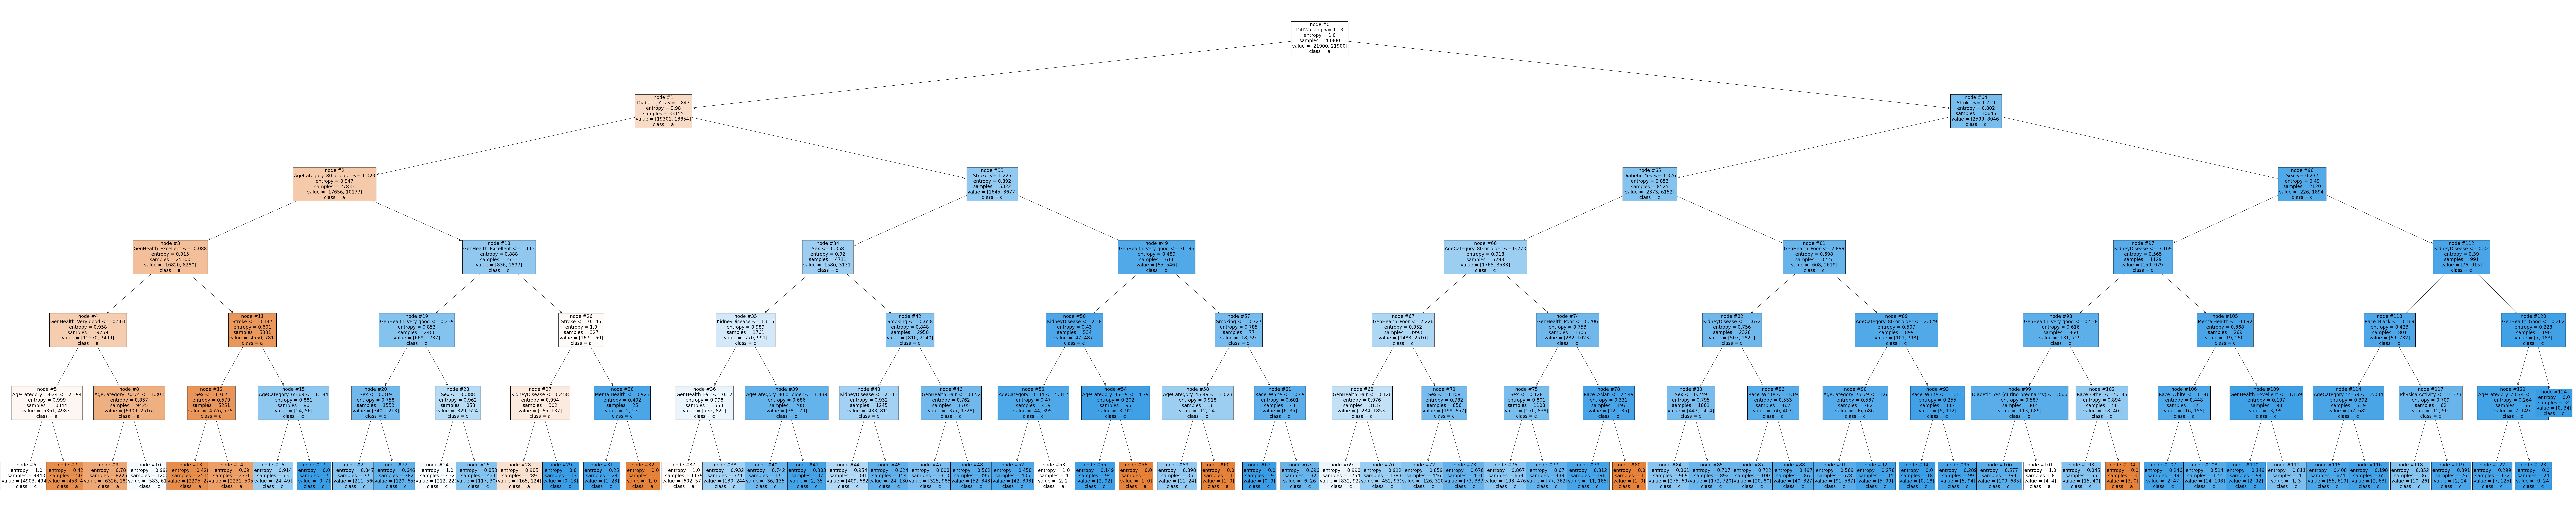

In [126]:
plt.figure(figsize = (200,40))
import sklearn
sklearn.tree.plot_tree(tree_clf,
                      feature_names = X.columns,
                      class_names = 'actual',
                      fontsize = 20,
                      filled = True,
                      node_ids  =True);

[[31995 26491]
 [  858  4615]] 



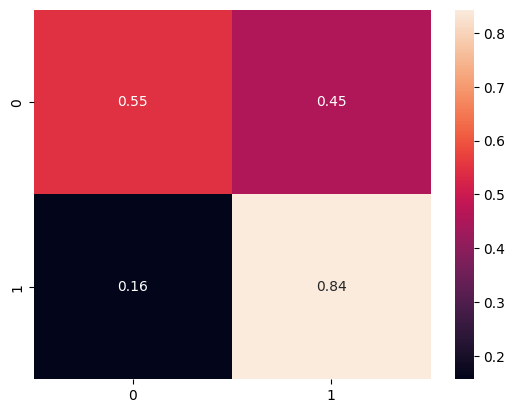

In [127]:
c_mat = confusion_matrix(y_test, tree_predictions)
print(c_mat,'\n')
# Visualizamos la matriz de confusion
sns.heatmap(c_mat/c_mat.sum(axis=1, keepdims=True), annot= True);

In [128]:
cr = classification_report(y_test, tree_predictions)
print(cr) 

              precision    recall  f1-score   support

         0.0       0.97      0.55      0.70     58486
         1.0       0.15      0.84      0.25      5473

    accuracy                           0.57     63959
   macro avg       0.56      0.70      0.48     63959
weighted avg       0.90      0.57      0.66     63959



## Modelo Support Vector Classification (SVC)

Se trata de un clasificador basado en un hiperplano que, aunque no separe prefectamente las dos clases, es más robusto y tiene mayor capacidad predictiva al aplicarlo a nuevas observaciones. Los SVC tienen un hiperparámetro llamado **C** que es el que controla el número y severidad de las violaciones del margen (y del hiperplano). Cuanto mayor es C, más overfitting hay. POr lo que en la práctica, su valor óptimo se identifica mediante validación cruzada.

PASO 1: Division de los datos en train y test (anteriormente hecho)

PASO 2: Creacion del modelo SVM Linear. Al ser un problema de clasificación binario, vamos a usar el modelo LinearSVC

In [129]:
# Creacion de nuestro modelo LinearSVC
svm_clf = LinearSVC(C = 1, loss = 'hinge', max_iter = 30000, random_state = 42)


In [130]:
# Entrenamos nuestro modelo
svm_clf.fit(X_train_new,y_train_new)

C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge', max_iter=30000, random_state=42)

In [131]:
# Obtenemos los scores
score = svm_clf.score(X_train_new, y_train_new)
print("Score: ", score)

Score:  0.7639041095890411


In [132]:
cv_scores = cross_val_score(svm_clf, X_train_new, y_train_new, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed t

CV average score: 0.76


C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [133]:
ypred = svm_clf.predict(X_test)

[[43328 15158]
 [ 1175  4298]]
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     58486
         1.0       0.22      0.79      0.34      5473

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959



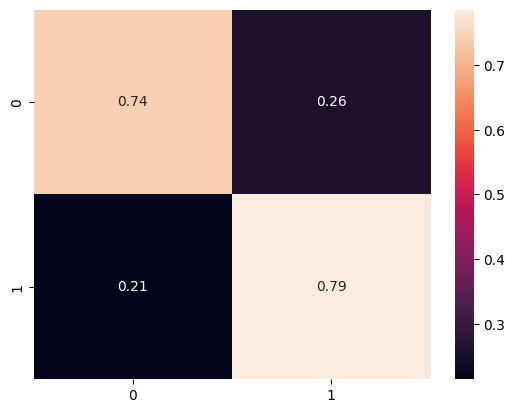

In [135]:
cm = confusion_matrix(y_test, ypred)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, ypred)
print(cr) 

GridSearch de los SVC

In [182]:
parameters_svc = {                    
            'C': [0.2, 0.3, 0.5, 0.8, 1.0], 
            'kernel': ["linear","rbf"],
            'gamma': ('scale', 'auto'),
            'random_state': [42]}

In [183]:
svc_clf = SVC()
grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring = 'recall', cv = 10)
grid_svc

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.2, 0.3, 0.5, 0.8, 1.0],
                         'gamma': ('scale', 'auto'),
                         'kernel': ['linear', 'rbf'], 'random_state': [42]},
             scoring='recall')

In [184]:
# Entrenamos nuestro grid svc
grid_svc.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.2, 0.3, 0.5, 0.8, 1.0],
                         'gamma': ('scale', 'auto'),
                         'kernel': ['linear', 'rbf'], 'random_state': [42]},
             scoring='recall')

In [185]:
print(grid_svc.best_score_)
print(grid_svc.best_params_)
svc_predictions = grid_svc.predict(X_test)
recall_score(y_test, svc_predictions)

0.8220091324200913
{'C': 0.2, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42}


0.8211218710031062

[[40988 17498]
 [  979  4494]]
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82     58486
         1.0       0.20      0.82      0.33      5473

    accuracy                           0.71     63959
   macro avg       0.59      0.76      0.57     63959
weighted avg       0.91      0.71      0.77     63959



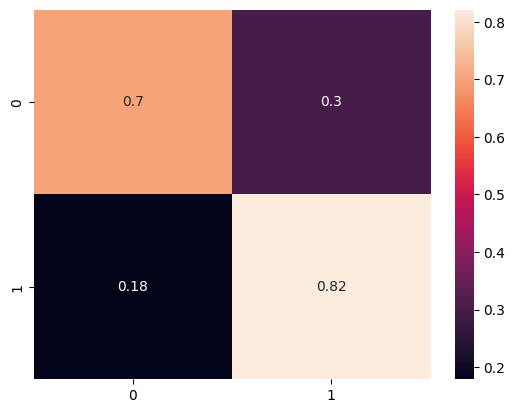

In [188]:
cm = confusion_matrix(y_test, svc_predictions)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, svc_predictions)
print(cr) 

## Bagging ##

In [139]:
kfold = KFold(n_splits = 10)
dtc = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(base_estimator = dtc,
                          n_estimators = 100,
                          random_state = 42)

bagging_clf.fit(X_train_new, y_train_new)
bagging_prediction = bagging_clf.predict(X_test)
recall_score(y_test, bagging_prediction)


0.758633290699799

GridSearch Bagging

In [146]:
parameters_bagging = {                    
            'n_estimators': [10,100,200],
            'random_state': [42]}
dtc = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator = dtc)
grid_bagging = GridSearchCV(bagging_clf, parameters_bagging, scoring = 'recall', cv = 10)
grid_bagging

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [10, 100, 200], 'random_state': [42]},
             scoring='recall')

In [147]:
grid_bagging.fit(X_train_new, y_train_new)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [10, 100, 200], 'random_state': [42]},
             scoring='recall')

In [148]:
print(grid_bagging .best_score_)
print(grid_bagging .best_params_)
bagging_predictions = grid_bagging.predict(X_test)
recall_score(y_test, bagging_predictions)

0.7616438356164383
{'n_estimators': 200, 'random_state': 42}


0.7600950118764845

[[41578 16908]
 [ 1313  4160]]
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58486
         1.0       0.20      0.76      0.31      5473

    accuracy                           0.72     63959
   macro avg       0.58      0.74      0.57     63959
weighted avg       0.90      0.72      0.78     63959



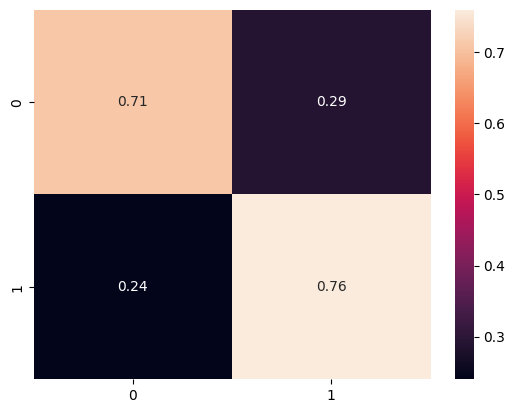

In [149]:
cm = confusion_matrix(y_test, bagging_predictions)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, bagging_predictions)
print(cr) 

## Random Forest

In [150]:
rfc_clf = RandomForestClassifier(n_estimators = 100,
                                 max_features = 3,
                                 random_state = 42)

rfc_clf.fit(X_train_new, y_train_new)
rfc_prediction = rfc_clf.predict(X_test)
recall_score(y_test, rfc_prediction)

0.7684999086424265

[[41806 16680]
 [ 1267  4206]]
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58486
         1.0       0.20      0.77      0.32      5473

    accuracy                           0.72     63959
   macro avg       0.59      0.74      0.57     63959
weighted avg       0.90      0.72      0.78     63959



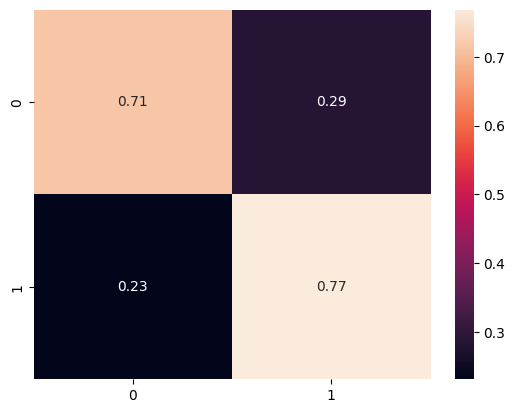

In [151]:
cm = confusion_matrix(y_test, rfc_prediction)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, rfc_prediction)
print(cr) 

GridSearch RandomForest Classifier

In [152]:
parameters_rfc = {'criterion': ['gini', 'entropy'],
                  'n_estimators': [10,100,200],
                  'random_state': [42],
                  'max_depth': [3,4,5,6,7,10],
                  'max_features': ["sqrt", 3, 4]} # Numero de features que utiliza en cada split.
                                                    # cuanto más bajo, mejor generalizará y menos overfitting.}

rfc_clf = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc_clf, parameters_rfc, scoring = 'recall', cv = 10)
grid_rfc

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 10],
                         'max_features': ['sqrt', 3, 4],
                         'n_estimators': [10, 100, 200], 'random_state': [42]},
             scoring='recall')

In [153]:
grid_rfc.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 10],
                         'max_features': ['sqrt', 3, 4],
                         'n_estimators': [10, 100, 200], 'random_state': [42]},
             scoring='recall')

In [154]:
print(grid_rfc .best_score_)
print(grid_rfc .best_params_)
rfc_predictions = grid_rfc.predict(X_test)
recall_score(y_test, rfc_predictions)

0.7620091324200914
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10, 'random_state': 42}


0.758085145258542

[[43085 15401]
 [ 1324  4149]]
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     58486
         1.0       0.21      0.76      0.33      5473

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.58     63959
weighted avg       0.91      0.74      0.79     63959



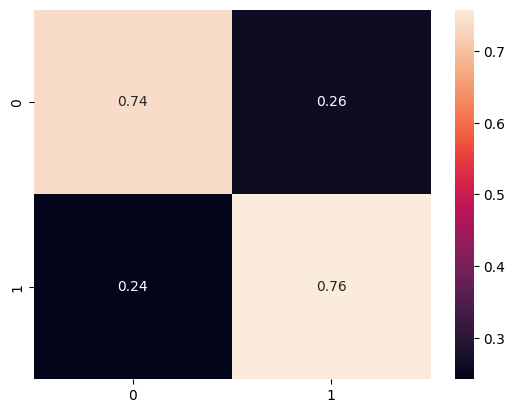

In [155]:
cm = confusion_matrix(y_test, rfc_predictions)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, rfc_predictions)
print(cr) 

## AdaBoost 

In [160]:
ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3),
                             n_estimators = 30,
                             random_state = 42)

ada_clf.fit(X_train_new, y_train_new)
ada_prediction = ada_clf.predict(X_test)
recall_score(y_test, ada_prediction)

0.7942627443815092

[[42569 15917]
 [ 1126  4347]]
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     58486
         1.0       0.21      0.79      0.34      5473

    accuracy                           0.73     63959
   macro avg       0.59      0.76      0.59     63959
weighted avg       0.91      0.73      0.79     63959



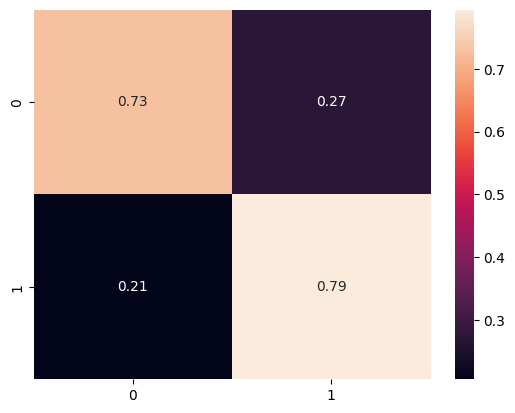

In [161]:
cm = confusion_matrix(y_test, ada_prediction)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, ada_prediction)
print(cr) 

GrisSearch AdaBoost

In [164]:
parameters_ada = {'n_estimators': [10, 50, 100],
                  'random_state': [42],
                  'learning_rate': [0.1, 0.3, 0.5]} 
                  
dtc = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(base_estimator = dtc)
grid_ada = GridSearchCV(ada_clf, parameters_ada, scoring = 'recall', cv = 10)
grid_ada

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'n_estimators': [10, 50, 100], 'random_state': [42]},
             scoring='recall')

In [ ]:
grid_ada.fit(X_train_new, y_train_new)

In [175]:
print(grid_ada.best_score_)
print(grid_ada.best_params_)

0.7246575342465753
{'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 42}


In [165]:
ada_prediction = grid_ada.predict(X_test)
recall_score(y_test, ada_prediction)

0.7164260917230039

[[41265 17221]
 [ 1552  3921]]
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.81     58486
         1.0       0.19      0.72      0.29      5473

    accuracy                           0.71     63959
   macro avg       0.57      0.71      0.55     63959
weighted avg       0.90      0.71      0.77     63959



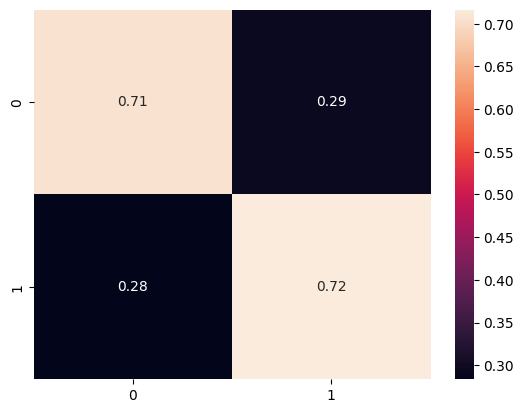

In [166]:
cm = confusion_matrix(y_test, ada_prediction)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, ada_prediction)
print(cr) 

## GradientBoosting

In [167]:
gbrt_clf = GradientBoostingClassifier(n_estimators = 100,
                                  random_state = 42)
                                  
gbrt_clf.fit(X_train_new, y_train_new)
gbrt_prediction = gbrt_clf.predict(X_test)
recall_score(y_test, gbrt_prediction)

0.7938973140873379

[[43239 15247]
 [ 1128  4345]]
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     58486
         1.0       0.22      0.79      0.35      5473

    accuracy                           0.74     63959
   macro avg       0.60      0.77      0.59     63959
weighted avg       0.91      0.74      0.80     63959



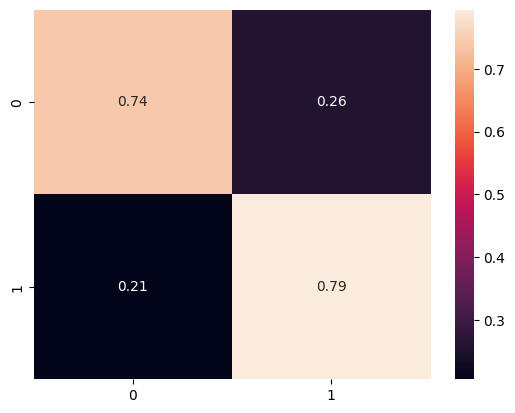

In [168]:
cm = confusion_matrix(y_test, gbrt_prediction)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, gbrt_prediction)
print(cr) 

GrisSearch GradientBoosting

In [169]:
parameters_gbrt = {'criterion': ['friedman_mse'],
                   'n_estimators': [10, 50, 100],
                   'random_state': [42],
                   'max_depth': [3,4,5,6],
                   'learning_rate': [0.1, 0.3, 0.5],
                   'loss': ['log_loss']} # ‘log_loss’ refers to binomial and multinomial deviance, the same as used in logistic regression.
                                         # It is a good choice for classification with probabilistic outputs. 

gbrt_clf = GradientBoostingClassifier()
grid_gbrt = GridSearchCV(gbrt_clf, parameters_gbrt, scoring = 'recall', cv = 10)
grid_gbrt

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.3, 0.5], 'loss': ['log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100], 'random_state': [42]},
             scoring='recall')

In [ ]:
grid_gbrt.fit(X_train_new, y_train_new)

In [176]:
print(grid_gbrt.best_score_)
print(grid_gbrt.best_params_)

0.8012328767123288
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}


In [170]:

gbrt_prediction = grid_gbrt.predict(X_test)
recall_score(y_test, gbrt_prediction)

0.7929837383519094

[[43037 15449]
 [ 1133  4340]]
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     58486
         1.0       0.22      0.79      0.34      5473

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959



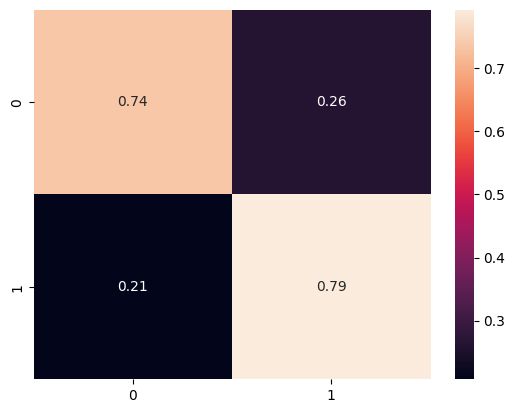

In [171]:
cm = confusion_matrix(y_test, gbrt_prediction)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, gbrt_prediction)
print(cr) 

## XGBoost

In [172]:
xgbc_clf = XGBClassifier(n_estimators = 100, use_label_encoder=False, eval_metric = 'logloss')

xgbc_clf.fit(X_train_new, y_train_new)
xgbc_prediction = xgbc_clf.predict(X_test)
recall_score(y_test, xgbc_prediction)

C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.7823862598209391

[[42747 15739]
 [ 1191  4282]]
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     58486
         1.0       0.21      0.78      0.34      5473

    accuracy                           0.74     63959
   macro avg       0.59      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959



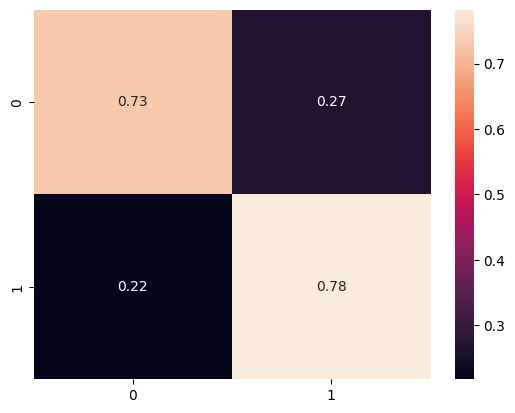

In [173]:
cm = confusion_matrix(y_test, xgbc_prediction)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, xgbc_prediction)
print(cr) 

GrisSearch XGBoost

In [177]:
parameters_xgbc = {'n_estimators': [10, 50, 100],
                   'use_label_encoder': [False],
                   'eval_metric': ['logloss'],
                   'random_state': [42],
                   'learning_rate': [0.1, 0.3, 0.5],
                   'max_depth': [3,4,5,6]}

xgbc_clf = XGBClassifier()
grid_xgbc = GridSearchCV(xgbc_clf, parameters_xgbc, scoring = 'recall', cv = 10)
grid_xgbc

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eval_metric': ['logloss'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100], 'random_state': [42],
                         'use_label_encoder': [False]},
             scoring='recall')

In [178]:
grid_xgbc.fit(X_train_new, y_train_new)

C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eval_metric': ['logloss'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100], 'random_state': [42],
                         'use_label_encoder': [False]},
             scoring='recall')

In [179]:
print(grid_xgbc.best_score_)
print(grid_xgbc.best_params_)

0.802648401826484
{'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'random_state': 42, 'use_label_encoder': False}


In [180]:
xgbc_prediction = grid_xgbc.predict(X_test)
recall_score(y_test, xgbc_prediction)

0.8059565137949936

[[42510 15976]
 [ 1062  4411]]
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     58486
         1.0       0.22      0.81      0.34      5473

    accuracy                           0.73     63959
   macro avg       0.60      0.77      0.59     63959
weighted avg       0.91      0.73      0.79     63959



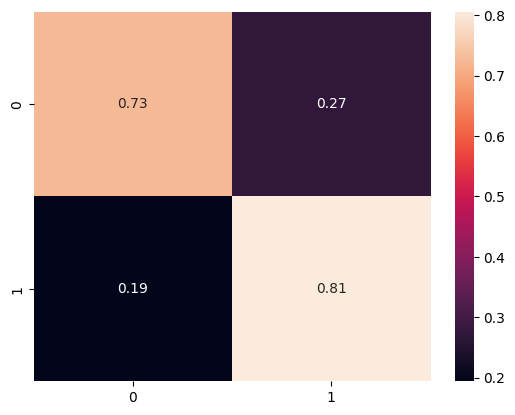

In [181]:
cm = confusion_matrix(y_test, xgbc_prediction)
print(cm)

# Visualizamos la matriz de confusion
sns.heatmap(cm/cm.sum(axis=1, keepdims=True), annot= True);

cr = classification_report(y_test, xgbc_prediction)
print(cr) 

## Pipeline

In [92]:
# Creamos todos nuestros modelos

# Si solo es el modelo, no hará falta meterlo en un pipeline
# Usamos "RandomUnderSampler" de la librería imblearn

#subsample = under_sampling.RandomUnderSampler(random_state = 42)
from imblearn.pipeline import make_pipeline as mp

ssmp = under_sampling.RandomUnderSampler(random_state = 42)

pipeRandForest = mp(ssmp, StandardScaler(), RandomForestClassifier())
print(pipeRandForest)

svm = mp(ssmp,StandardScaler(),SVC())
print(svm)         

reg_log = mp(ssmp,StandardScaler(),LogisticRegression())  
print(reg_log)

bag = mp(ssmp,StandardScaler(),BaggingClassifier())  
print(bag)

dtc = mp(StandardScaler(),DecisionTreeClassifier())
print(dtc)

base_estimator = DecisionTreeClassifier()

ada = mp(ssmp,StandardScaler(),AdaBoostClassifier(base_estimator = base_estimator))
print(ada)

gbc = mp(ssmp,StandardScaler(),GradientBoostingClassifier())
print(gbc)

xgb = mp(ssmp,StandardScaler(),XGBClassifier())
print(xgb)

Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('standardscaler', StandardScaler()), ('svc', SVC())])
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('standardscaler', StandardScaler()),
                ('baggingclassifier', BaggingClassifier())])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])
Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=42)),
                ('standardscaler', StandardScaler()),
        

In [93]:


# PARÁMETROS

reg_log_param = {"logisticregression__penalty": ["l2"], 
                 "logisticregression__C": [0.5],
                 "logisticregression__random_state": [42],
                 "logisticregression__max_iter": [50],
                 "logisticregression__solver": ['liblinear'],
                 "logisticregression__multi_class": ['auto']
                }

parameters_dtc = {'decisiontreeclassifier__criterion': ['entropy'],
                  'decisiontreeclassifier__splitter': ['best', 'random'],
                  'decisiontreeclassifier__max_depth': [6],
                  'decisiontreeclassifier__min_samples_leaf': [1],
                  'decisiontreeclassifier__random_state': [42],
                  'decisiontreeclassifier__class_weight': ['balanced']
                 }
              
parameters_svc = {                    
            'svc__C': [0.2], 
            'svc__kernel': ["rbf"],
            'svc__gamma': ['auto'],
            'svc__random_state': [42]}

parameters_bagging = {                    
            'baggingclassifier__n_estimators': [200],
            'baggingclassifier__random_state': [42]}

parameters_rfc = {'randomforestclassifier__criterion': ['entropy'],
                  'randomforestclassifier__n_estimators': [10],
                  'randomforestclassifier__random_state': [42],
                  'randomforestclassifier__max_depth': [10],
                  'randomforestclassifier__max_features': ["sqrt"]} 

parameters_ada = {'adaboostclassifier__n_estimators': [100],
                  'adaboostclassifier__random_state': [42],
                  'adaboostclassifier__learning_rate': [0.5],
                  'adaboostclassifier__base_estimator__criterion': ['entropy'],
                  'adaboostclassifier__base_estimator__splitter': ['best', 'random'],
                  'adaboostclassifier__base_estimator__max_depth': [6],
                  'adaboostclassifier__base_estimator__min_samples_leaf': [1],
                  'adaboostclassifier__base_estimator__random_state': [42],
                  'adaboostclassifier__base_estimator__class_weight': ['balanced']
                  }

parameters_gbrt = {'gradientboostingclassifier__criterion': ['friedman_mse'],
                   'gradientboostingclassifier__n_estimators': [100],
                   'gradientboostingclassifier__random_state': [42],
                   'gradientboostingclassifier__max_depth': [5],
                   'gradientboostingclassifier__learning_rate': [0.1],
                   'gradientboostingclassifier__loss': ['log_loss']}

parameters_xgbc = {'xgbclassifier__n_estimators': [50],
                   'xgbclassifier__use_label_encoder': [False],
                   'xgbclassifier__eval_metric': ['logloss'],
                   'xgbclassifier__random_state': [42],
                   'xgbclassifier__learning_rate': [0.1],
                   'xgbclassifier__max_depth': [5]}

In [96]:
# Almaceno en una lista de tuplas los modelos (nombre que le pongo, el modelo, hiperparametros)
models = [('reglog', reg_log, reg_log_param),
          ('dtc', dtc, parameters_dtc),
          ('svc', svm, parameters_svc),
          ('bagging', bag, parameters_bagging),
          ('rand_forest', pipeRandForest, parameters_rfc),
          ('ada', ada, parameters_ada),
          ('gbrt', gbc, parameters_gbrt),
          ('xgbc', xgb, parameters_xgbc)
         ]

In [97]:

X = df_heart_disease_transformed.drop(['HeartDisease'], axis=1)
y = df_heart_disease_transformed['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [98]:
# Declaro en un diccionario los pipelines e hiperparametros
models_gridsearch = {}

for i in models:
    models_gridsearch[i[0]] = GridSearchCV(estimator = i[1],
                                          param_grid = i[2],
                                          cv=10,
                                          scoring="recall",
                                          verbose=1,
                                          n_jobs=-1)
    
    models_gridsearch[i[0]].fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\sesco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [105]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

Grid  Best score
1          dtc    0.839772
2          svc    0.823151
6         gbrt    0.802785
7         xgbc    0.798265
0       reglog    0.781689
5          ada    0.771781
3      bagging    0.766530
4  rand_forest    0.755114

In [122]:
# El mejor ha sido la regresion logistica. Ya esta entrenada con todo train
models_gridsearch['dtc'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=6,
                                        random_state=42, splitter='random'))])

In [130]:
# La probamos en test
models_gridsearch['dtc'].best_estimator_.score(X_test, y_test)

0.5880954986788411

## Guardar el modelo

In [132]:
# Guardar el modelo
import pickle

with open('finished_model.model', "wb") as archivo_salida:
    pickle.dump(models_gridsearch['dtc'].best_estimator_, archivo_salida)

In [133]:
# Para volver a leer el modelo
with open('finished_model.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)
    
print(pipeline_importada)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=6,
                                        random_state=42, splitter='random'))])
